# Investigate Stamps

Noah Stiegler

6/23/2024

Looking through stamp files for the first hits in the dataset to see if there's anything interesting to look at

Note that I'm using the base (Python 3.7) conda environment on blpc1

## Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Import regular packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

In [3]:
# Next we'll import the seticore viewer package: 
# Unfortunately, it can be a little fiddley
# I'm using the Python 3.7 (base) conda environment on blpc1 
# I was having issues with the Python 3.9 seticore_viewer conda environment I created on blpc1
# The standard maintained branch is https://github.com/MydonSolutions/seticore
# although I added some additional functionality on my own fork at https://github.com/NMStiegler/seticore
# so if my plots look different that's why
# These packages may need to be pip installed if they're not already
try:
    from seticore import viewer
except:
    # May need to install pycapnp
    try:
        %pip install pycapnp
    except:
        %conda install pycapnp
    # %pip install "git+https://github.com/NMStiegler/seticore#egg=seticore&subdirectory=python"
    %pip install pip install "git+https://github.com/MydonSolutions/seticore#egg=seticore&subdirectory=python"
    from seticore import viewer

In [4]:
# Define where the data is

# Check which server we're on (in case the data is in different places on different servers)
import socket
hostname = socket.gethostname()

# Get paths to data
if hostname == "blpc1":
    DATA_PATH = "/datax/scratch/nstieg/"
    # Define which data you want to look at
    BFR_PATH = DATA_PATH + "23A-362.sb43789194.eb44583327.60212.544836180554.9.1.AC.C704.0000.bfr5"
    STAMPS_PATH = DATA_PATH + "23A-362.sb43789194.eb44583327.60212.544836180554.9.1.AC.C704.0000.raw.seticore.0000.stamps"
else:
    raise Exception("Data path not known")

In [5]:
# Load in the stamps (with recipes in bfr5 file with the same name in the same location)
# and make sure they all got read in correctly
stamps_gen = viewer.read_stamps(STAMPS_PATH, find_recipe=True)
stamps = []
for stamp in stamps_gen:
    stamps.append(stamp)
    assert(stamp != None)
    assert(stamp.recipe != None)

print("Found:", len(stamps), "stamps")

Found: 49 stamps


/home/nstieg/.local/lib/python3.7/site-packages/seticore/viewer.py:125: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  self.h5 = h5py.File(filepath)


## Investigating first stamp file

### Investigate data contents of stamp file

In [7]:
# Figure out what's in the first stamp 
stamp = stamps[0]
s = stamp.stamp
# print(s) # Gets large

In [8]:
# Look at what's in a recipe
def print_recipe(stamp):
    recipe = stamp.recipe
    print("h5", recipe.h5)
    print("ras", recipe.ras)
    print("decs", recipe.decs)
    print("obsid", recipe.obsid)
    print("src_names", recipe.src_names)
    print("time_array", recipe.time_array)
    print("npol", recipe.npol)
    print("nbeams", recipe.nbeams)
    print("cal_all", recipe.cal_all)
    print("nants", recipe.nants)
    print("nchan", recipe.nchan)

# Look at what's in the first recipe file
# print_recipe(stamps[0]) # Also large

### Make waterfall plots from first stamp file

In [9]:
# We're investigating the first stamp file
stamp = stamps[0]

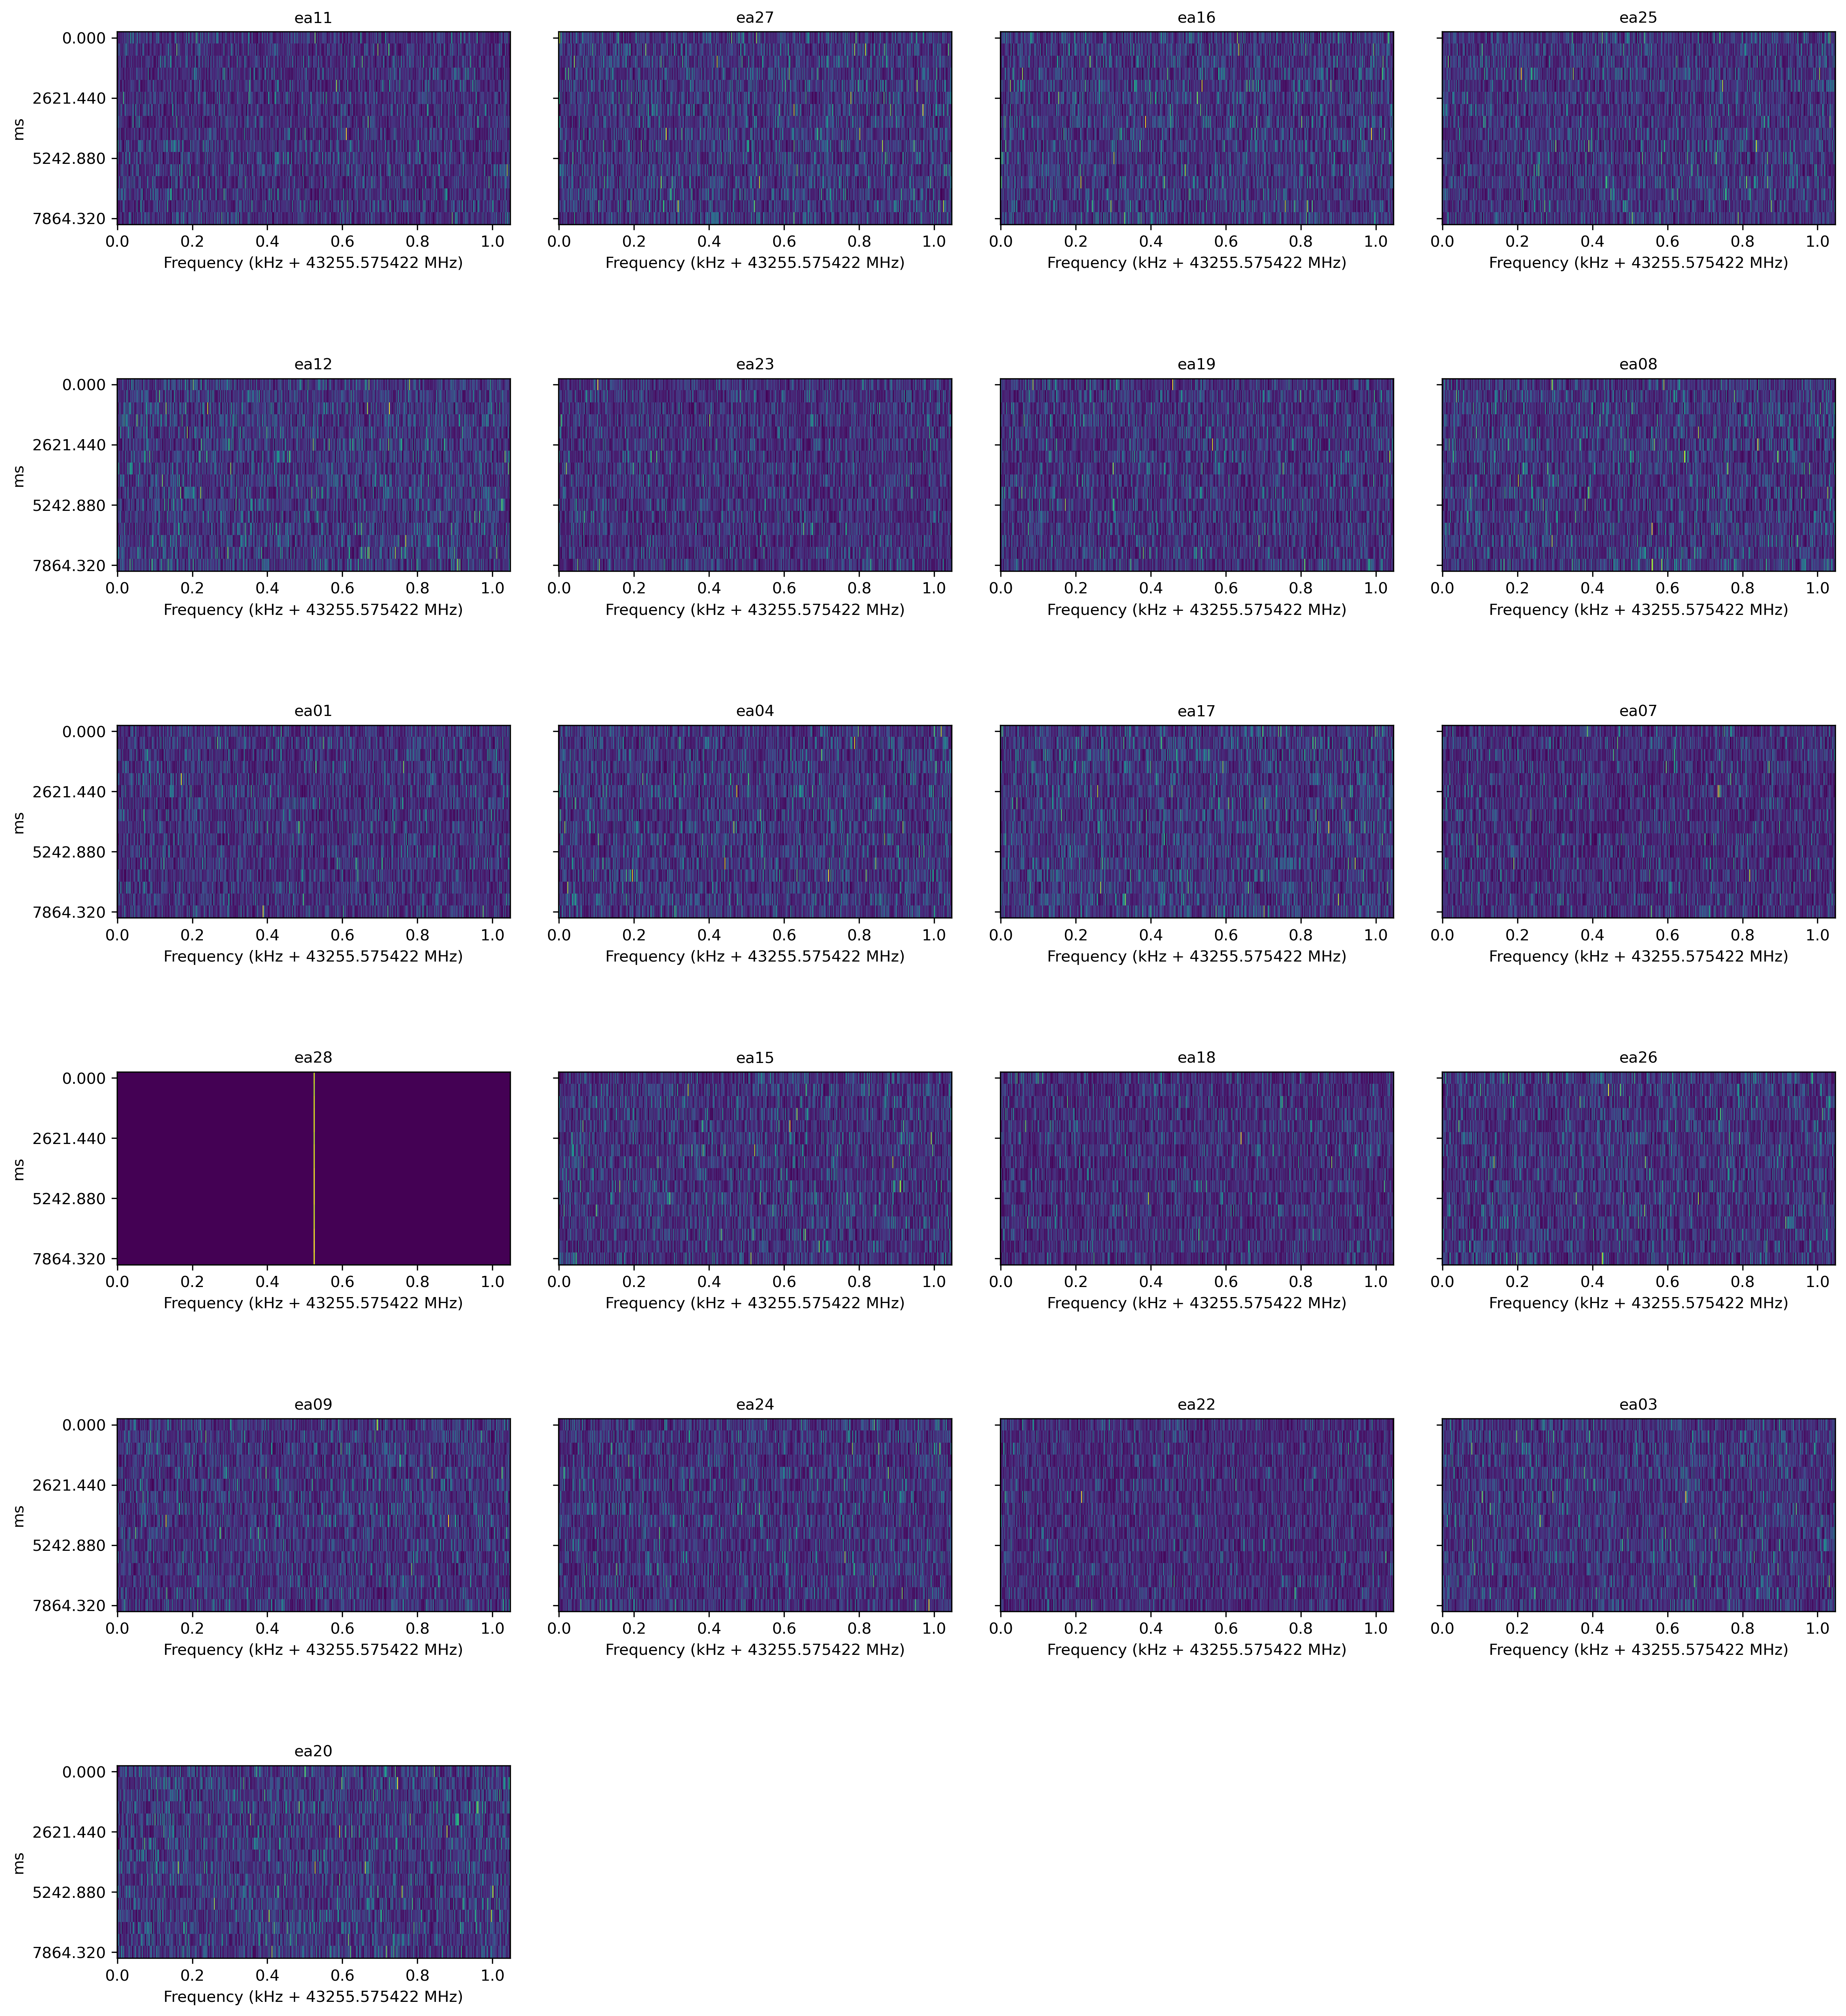

In [10]:
# Look at the antenna volages
# Note that the signal comes from just one antenna, which is a sign of antenna-generated RFI
stamp.show_antennas()

recalculated power: 1.077192e+14
local SNR: 13837.185084537112


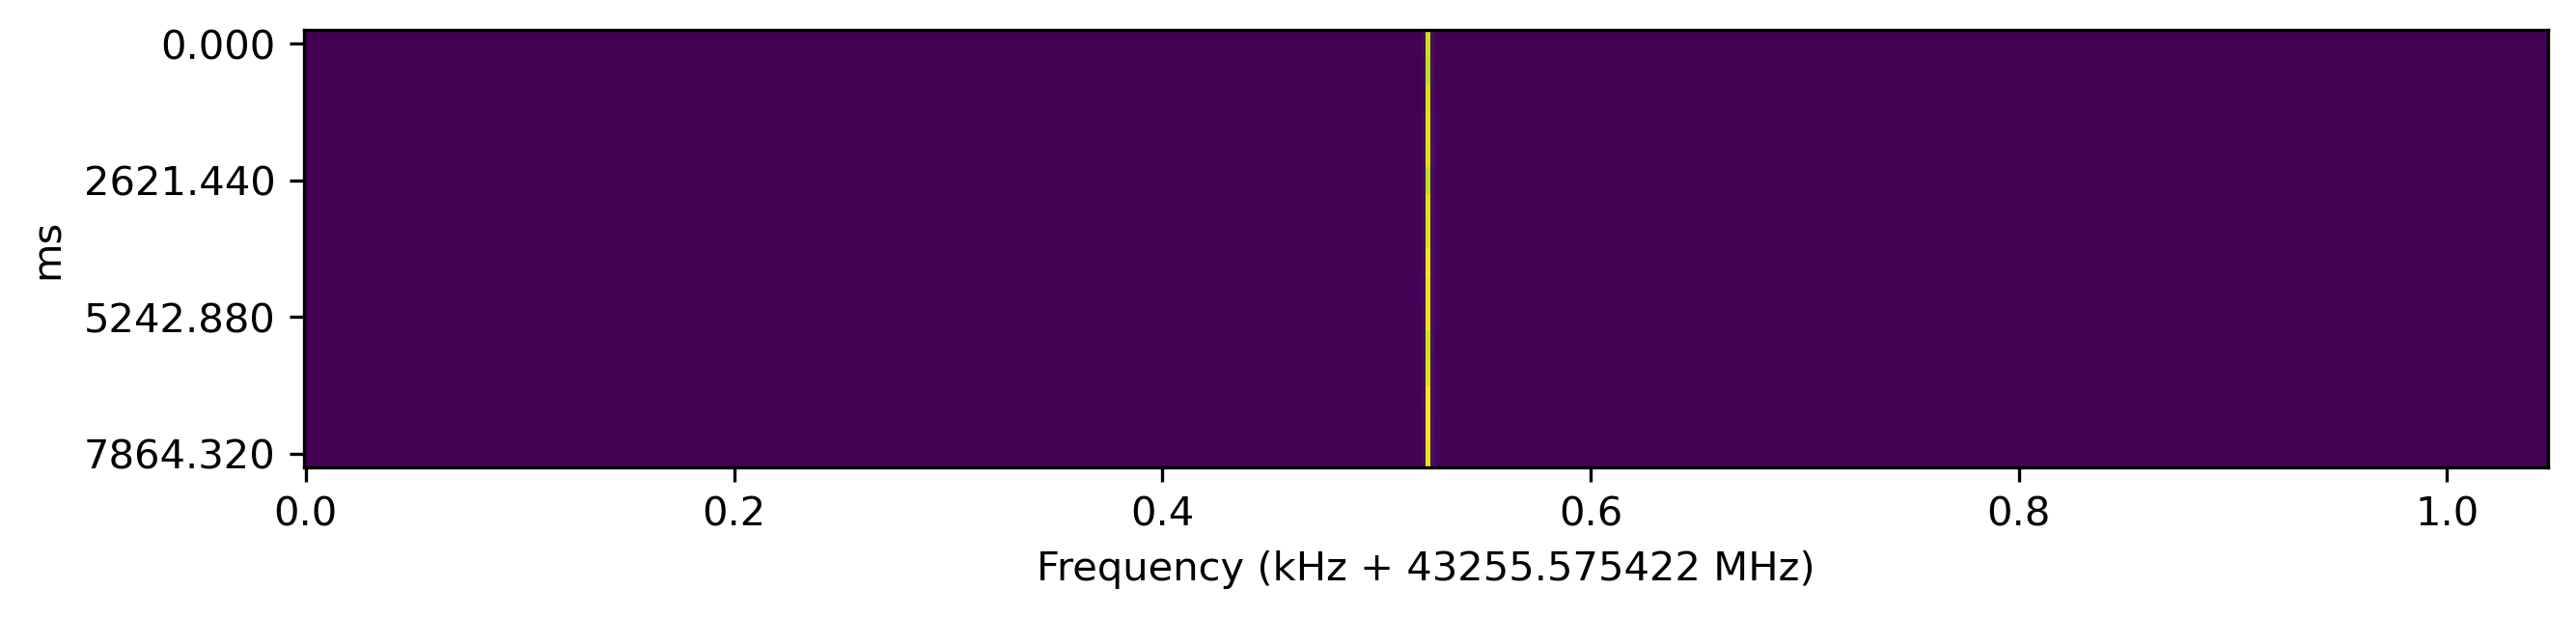

recalculated power: 1.077192e+14
local SNR: 13837.185084537108


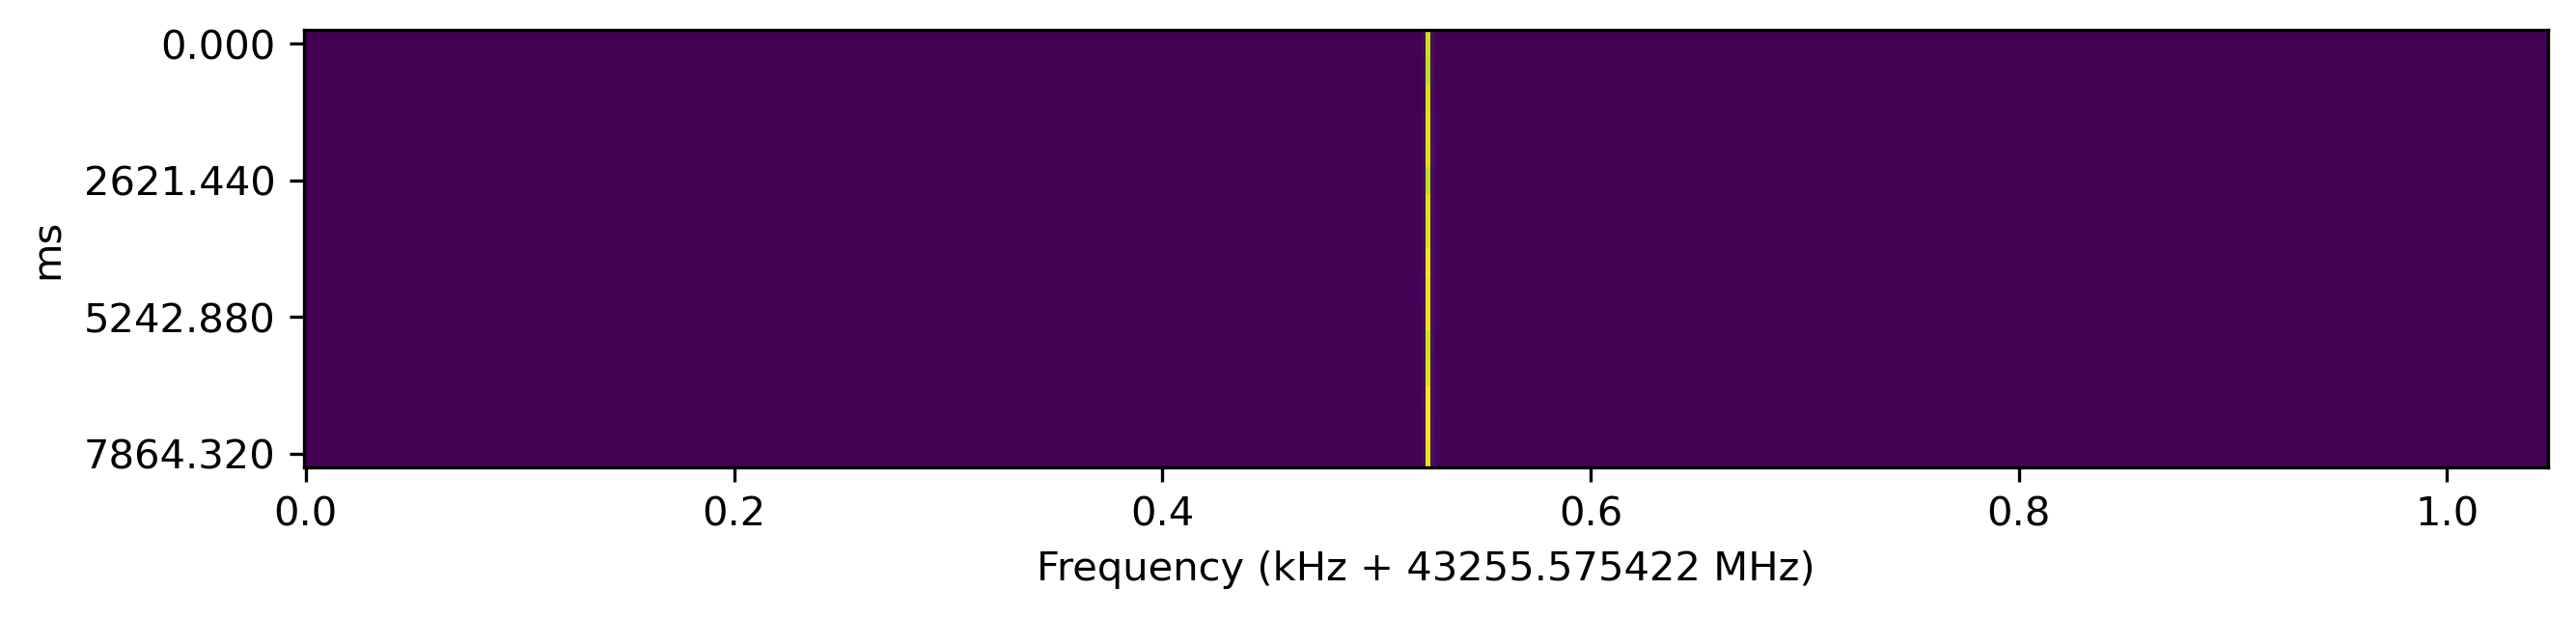

In [11]:
# Look at the incoherent beam
# There are 2 ways to do this and I don't really understand the difference between them
stamp.show_classic_incoherent()
stamp.show_weighted_incoherent()

In [24]:
# To figure out how many beams were formed, use
print(stamp.recipe.nbeams, "beam(s) were formed")

1 beam(s) were formed


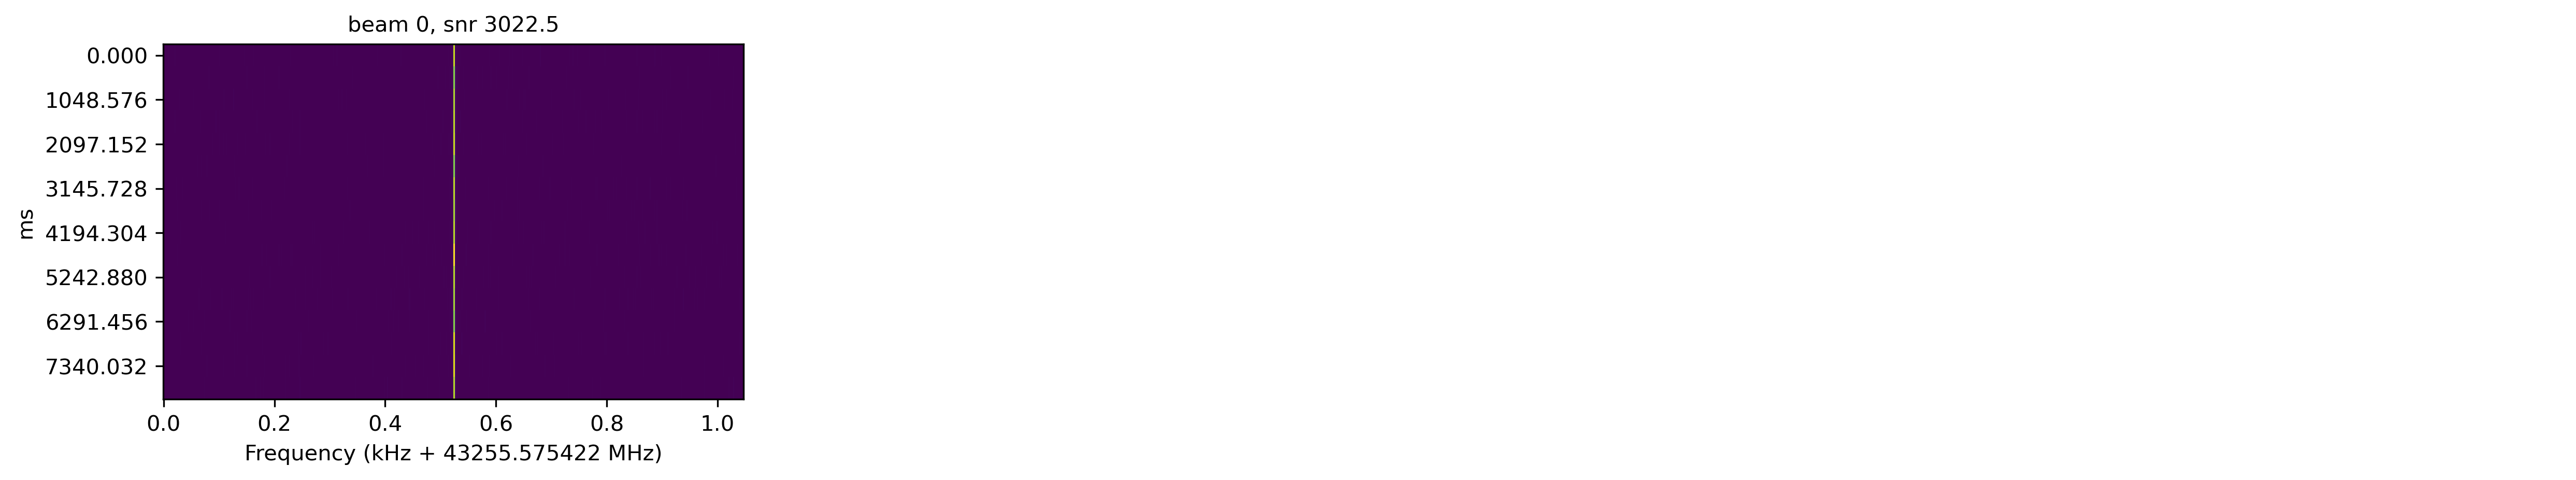

recalculated power: 1.087394e+14
local SNR: 3022.511932481911


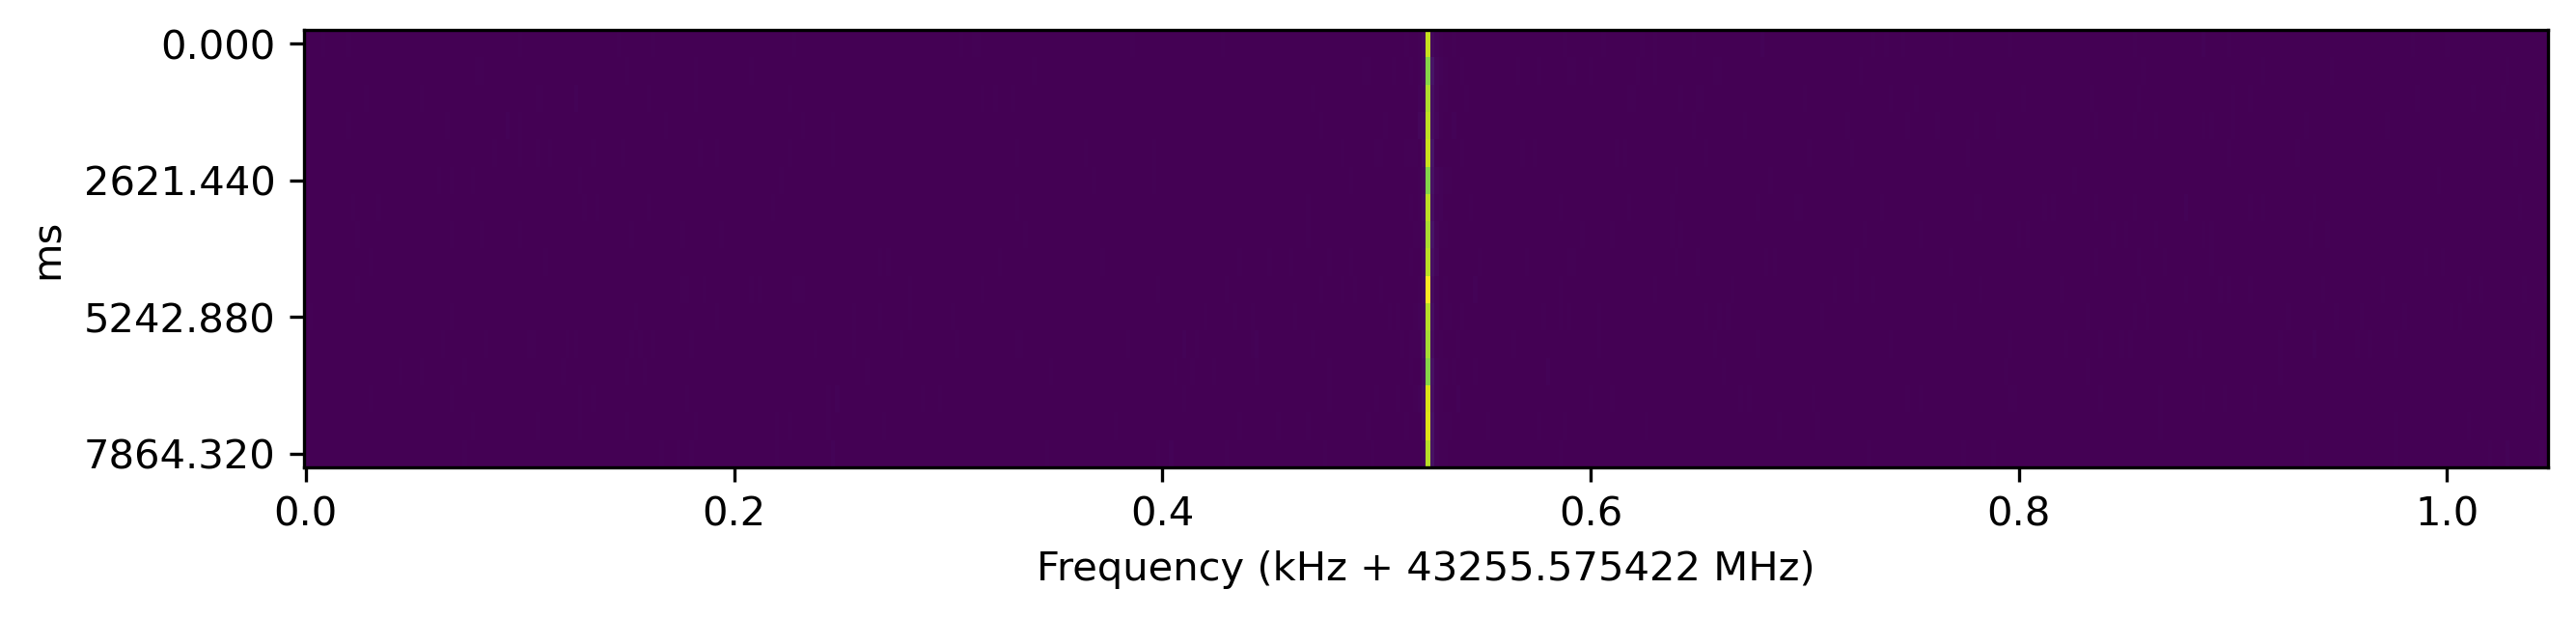

In [17]:
# Look at the coherent beams
stamp.show_beams() # Look at all of them
stamp.show_beam(0) # Look at a specific one, 0 indexed (-1 works to get last beam)

## Investigate metadata from all stamps

In [25]:
# Unravel metadata information for all the stamps in the file
frequencies = [stamp.stamp.signal.frequency for stamp in stamps]
drift_rates = [stamp.stamp.signal.driftRate for stamp in stamps]
snrs = [stamp.stamp.signal.snr for stamp in stamps]
powers = [stamp.stamp.signal.power for stamp in stamps]
incoherent_powerse = [stamp.stamp.signal.incoherentPower for stamp in stamps]

## Investigate stamps of first four hits in the hits database

### Match hits from stamp hit database to the stamps in the file

In [28]:
# See if there are any hits at exactly the same frequency
# If not, we can use the frequency as a unique identifier
# to match stamp files with their metadata (like a database ID
# to do a join with)
print(len(frequencies), "stamp file frequencies")
print(len(np.unique(frequencies)), "unique stamp file frequencies")
assert(len(frequencies) == len(np.unique(frequencies)))

49 stamp file frequencies
49 unique stamp file frequencies


In [30]:
# Frequencies of the first four hits in the stamp hit dataset
# These four are all in this stamp file (or should be)
frequencies_of_first_four = [
    43255.9054468941,
    43255.65711010211,
    43255.68989742511,
    43256.36075199359
]

# Want to find which stamp file corresponds with which
# hit from the stamp hit database. However, they're not
# ordered the same way
# So we want to find the indices in the stamp file of the stamps
# which match the first four hits, using frequency as a unique
# idenifier
def find_index(frequency):
    for i, freq in enumerate(frequencies):
        if freq == frequency:
            return i
    return -1

# Find the indices
indices_of_hits = [find_index(freq) for freq in frequencies_of_first_four]
print("The stamp file indices of the first four hits are:", indices_of_hits)

The stamp file indices of the first four hits are: [28, 4, 24, 14]


### Investigate these matched hits

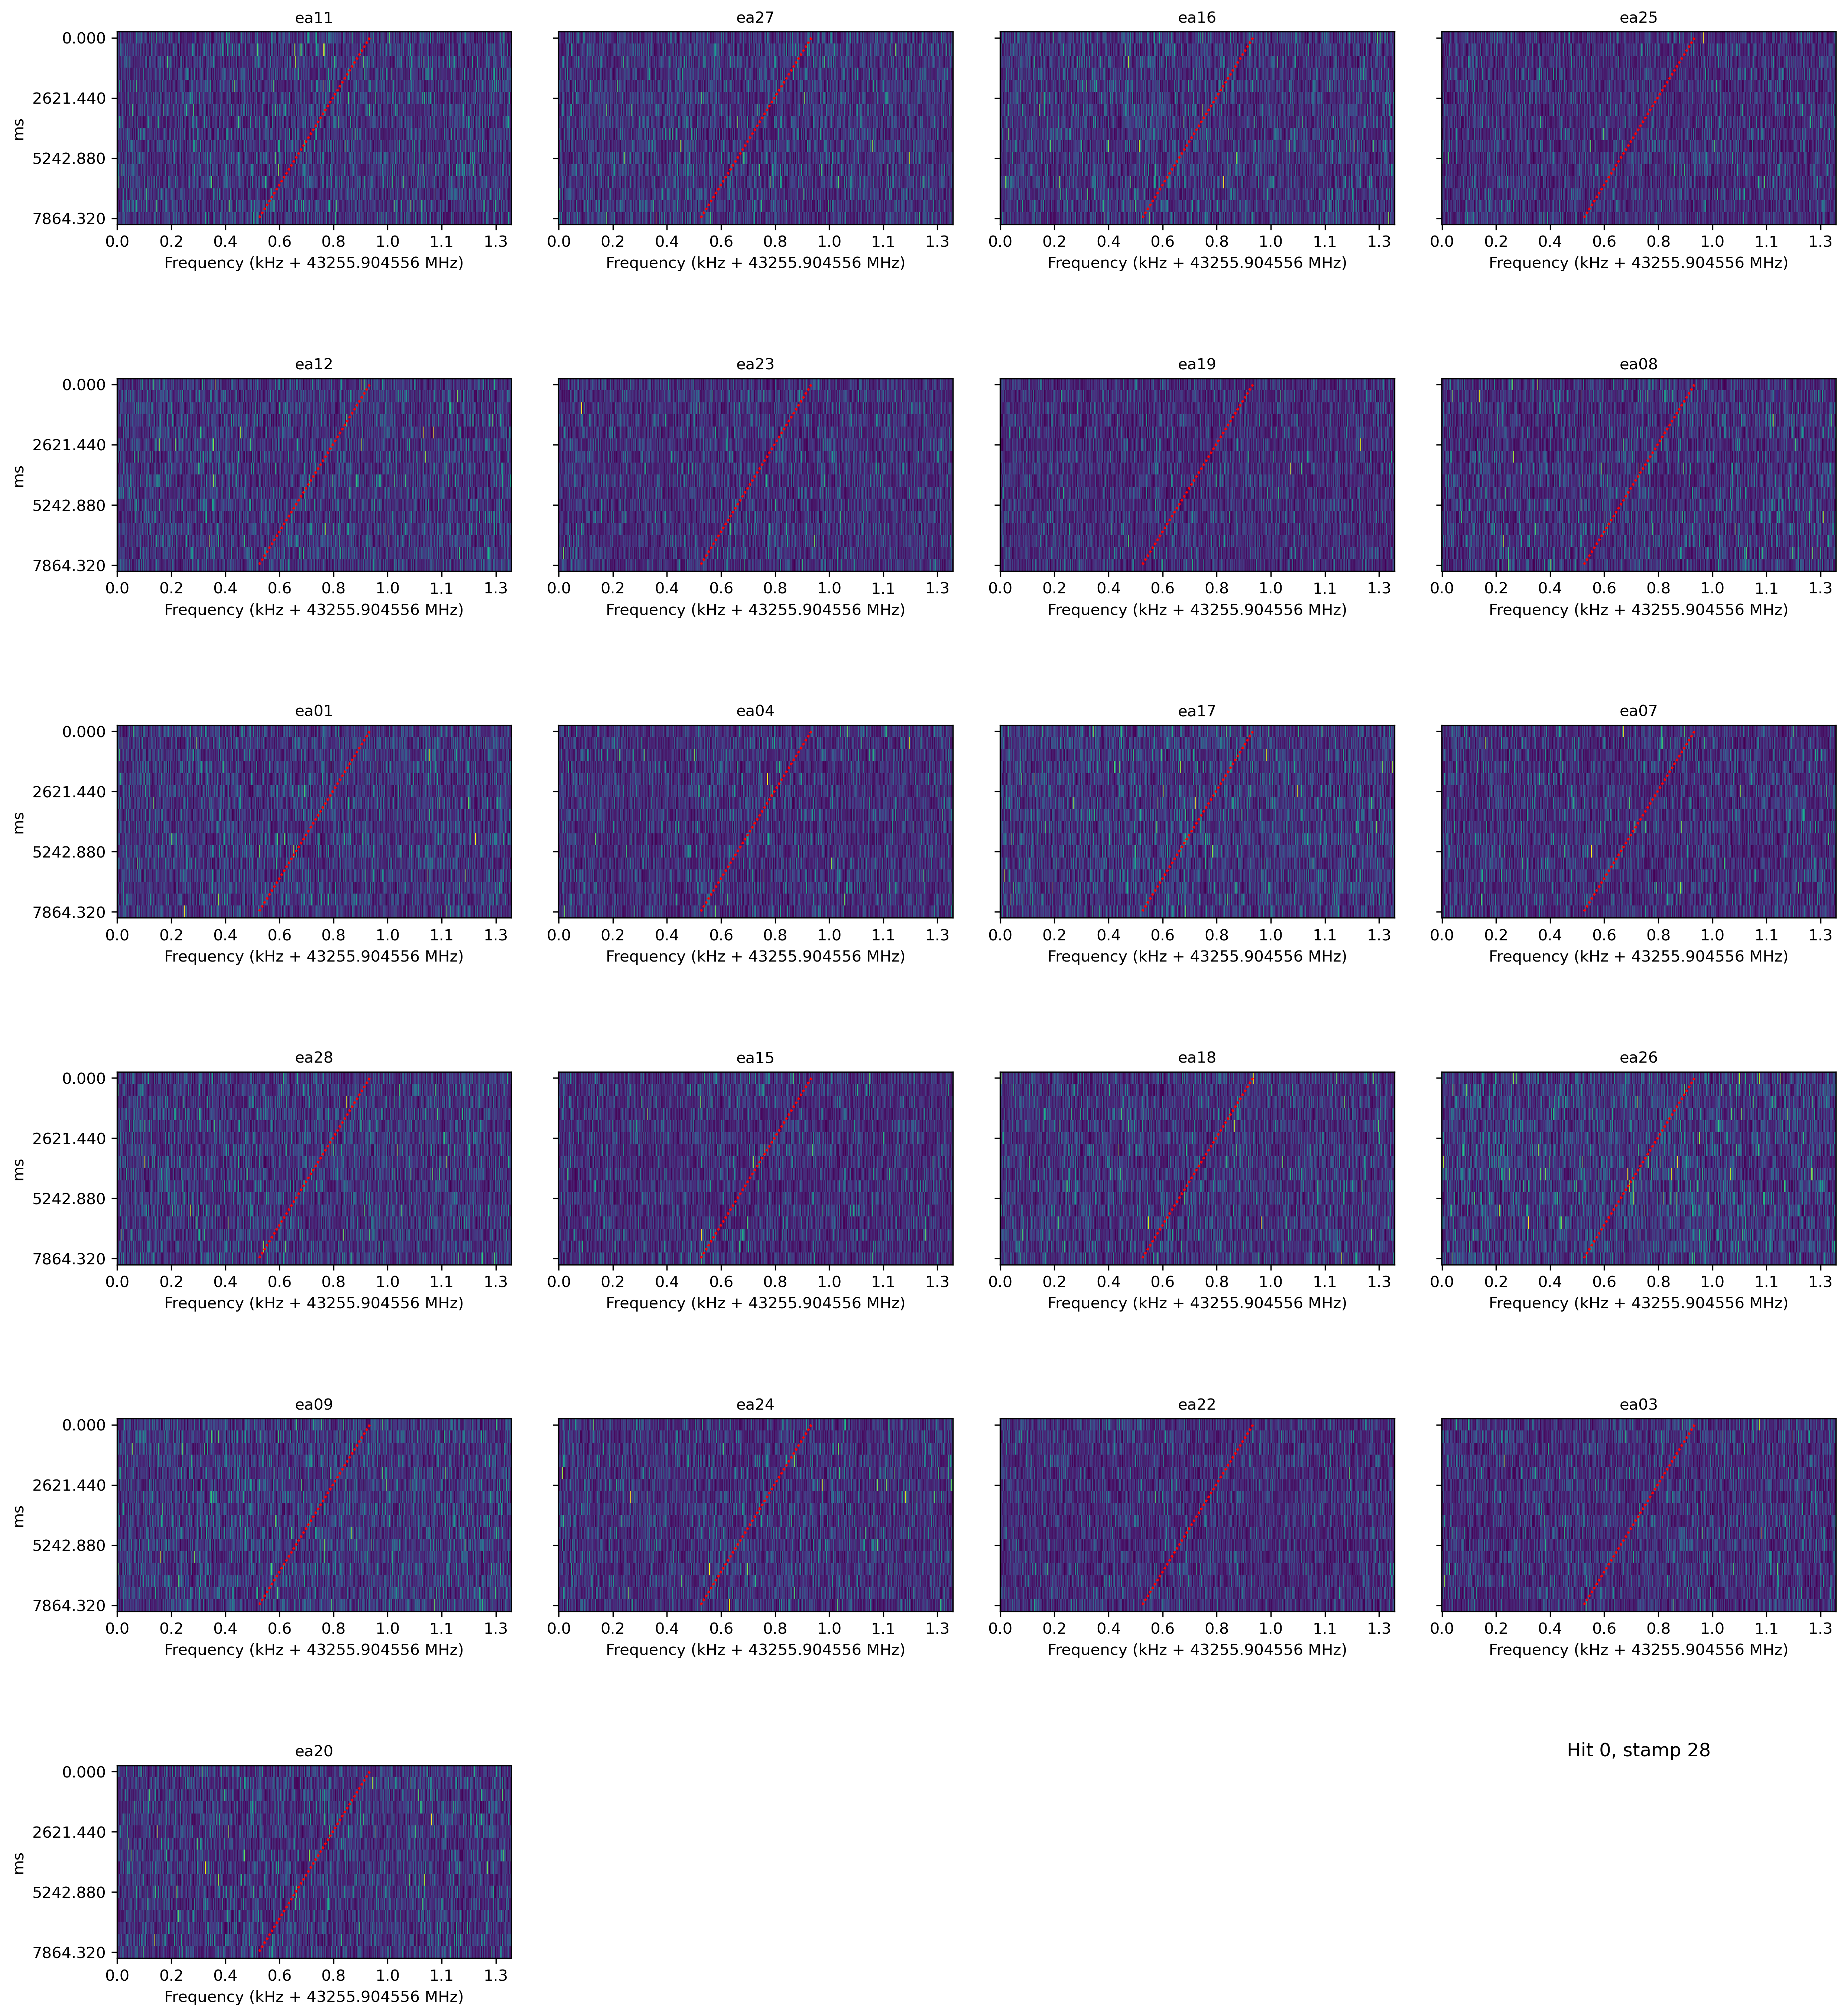

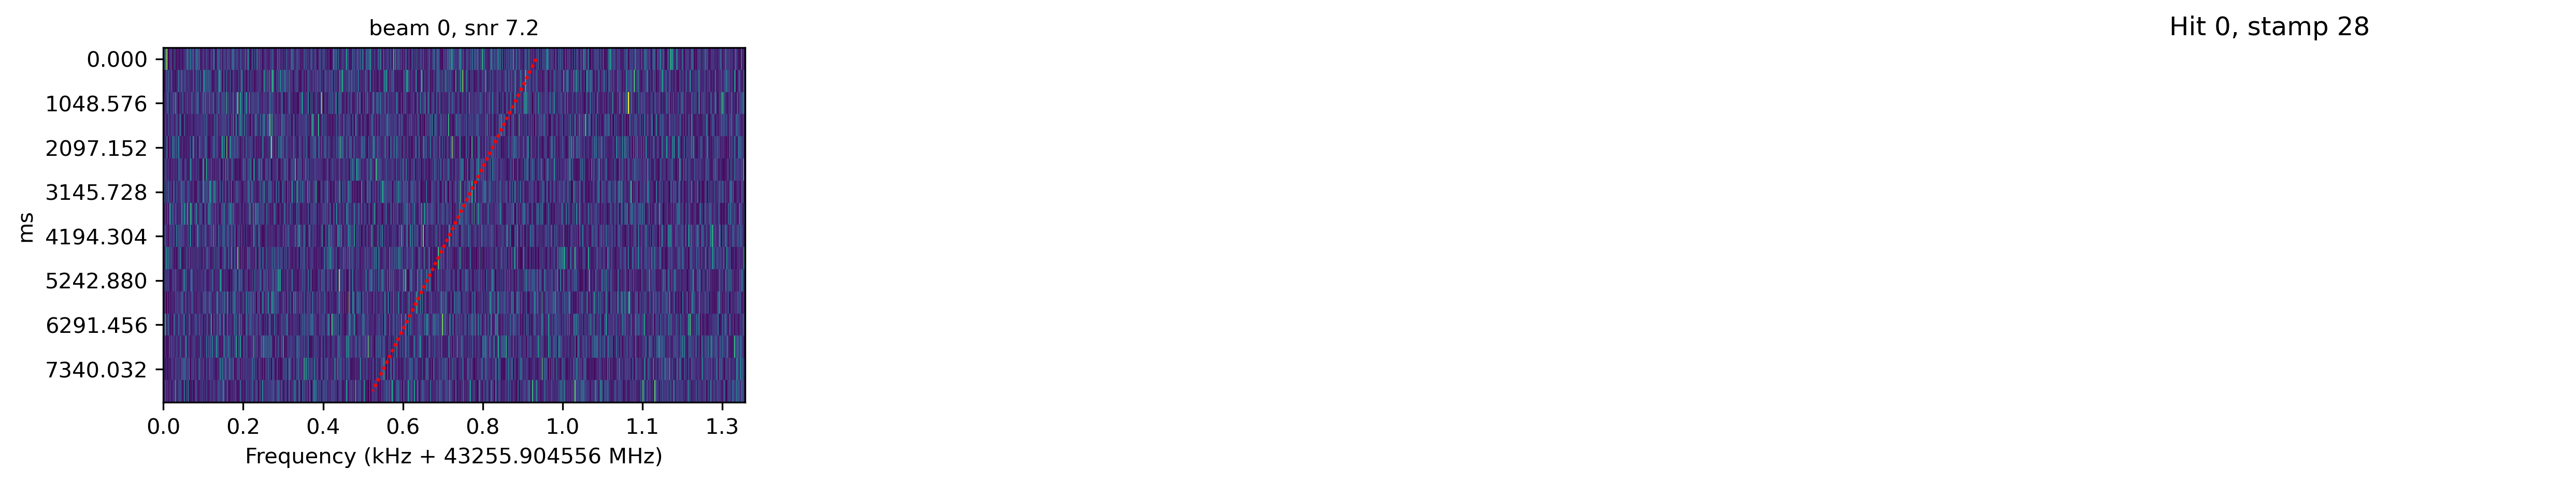

recalculated power: 2.589299e+11
local SNR: -5.32774639509624


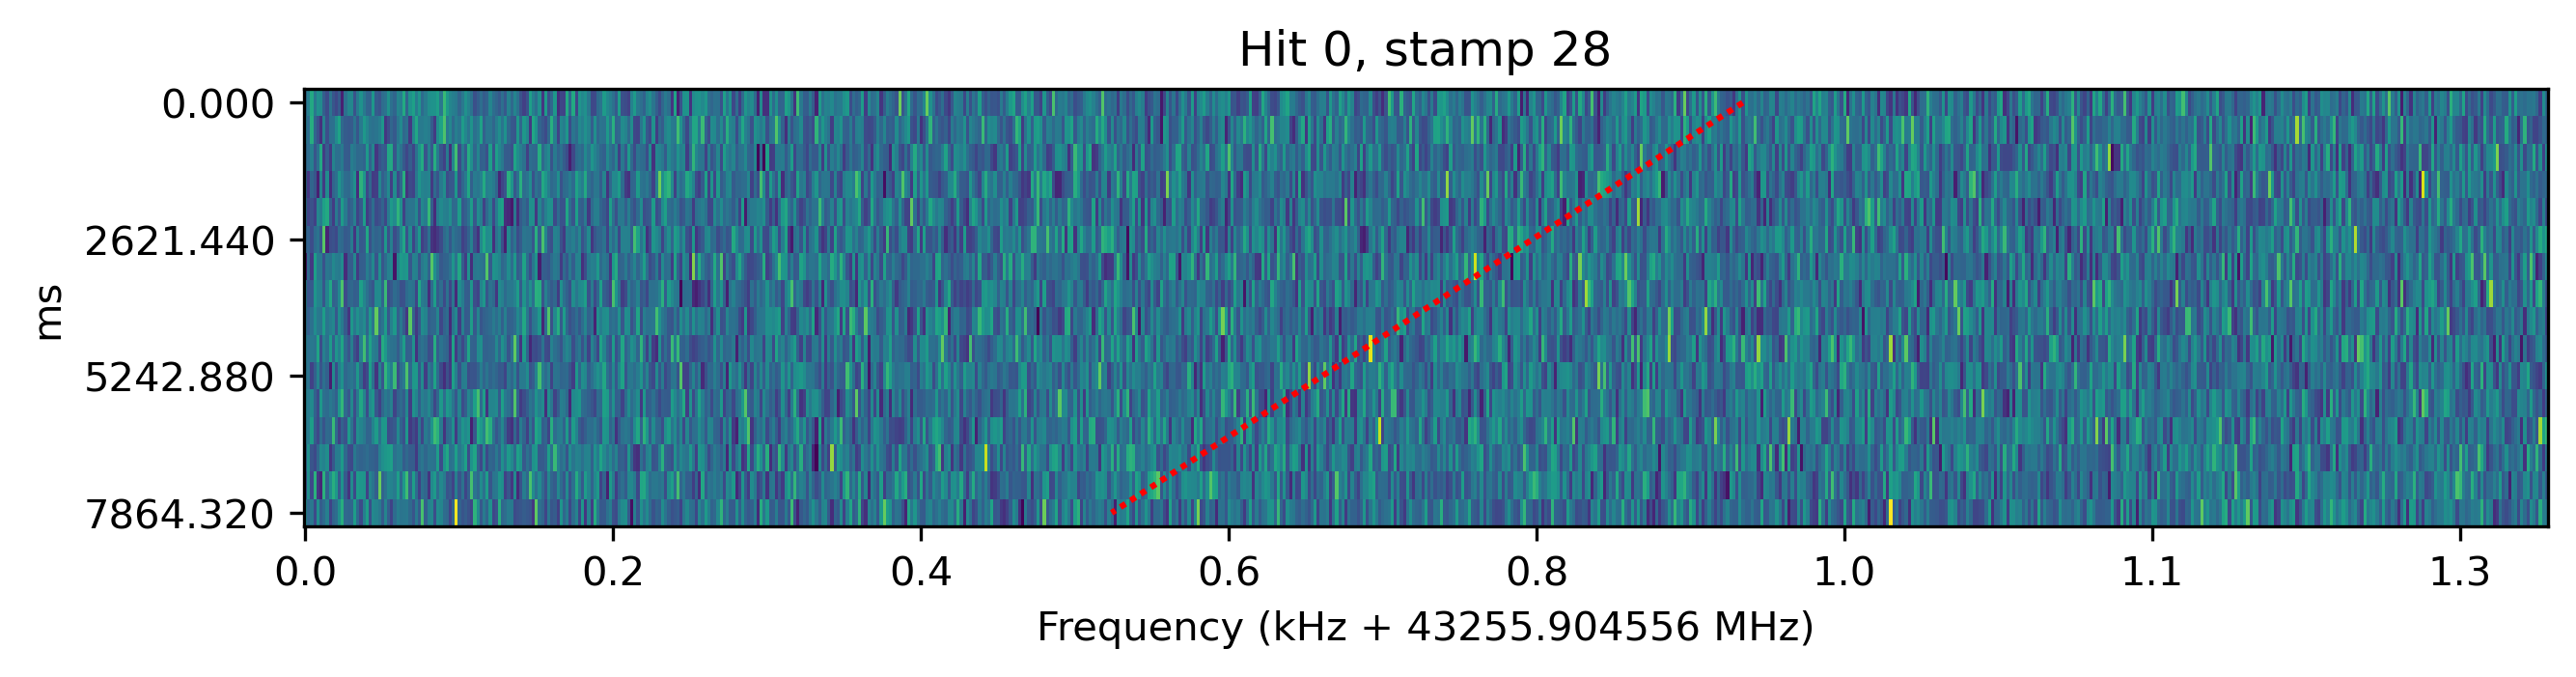

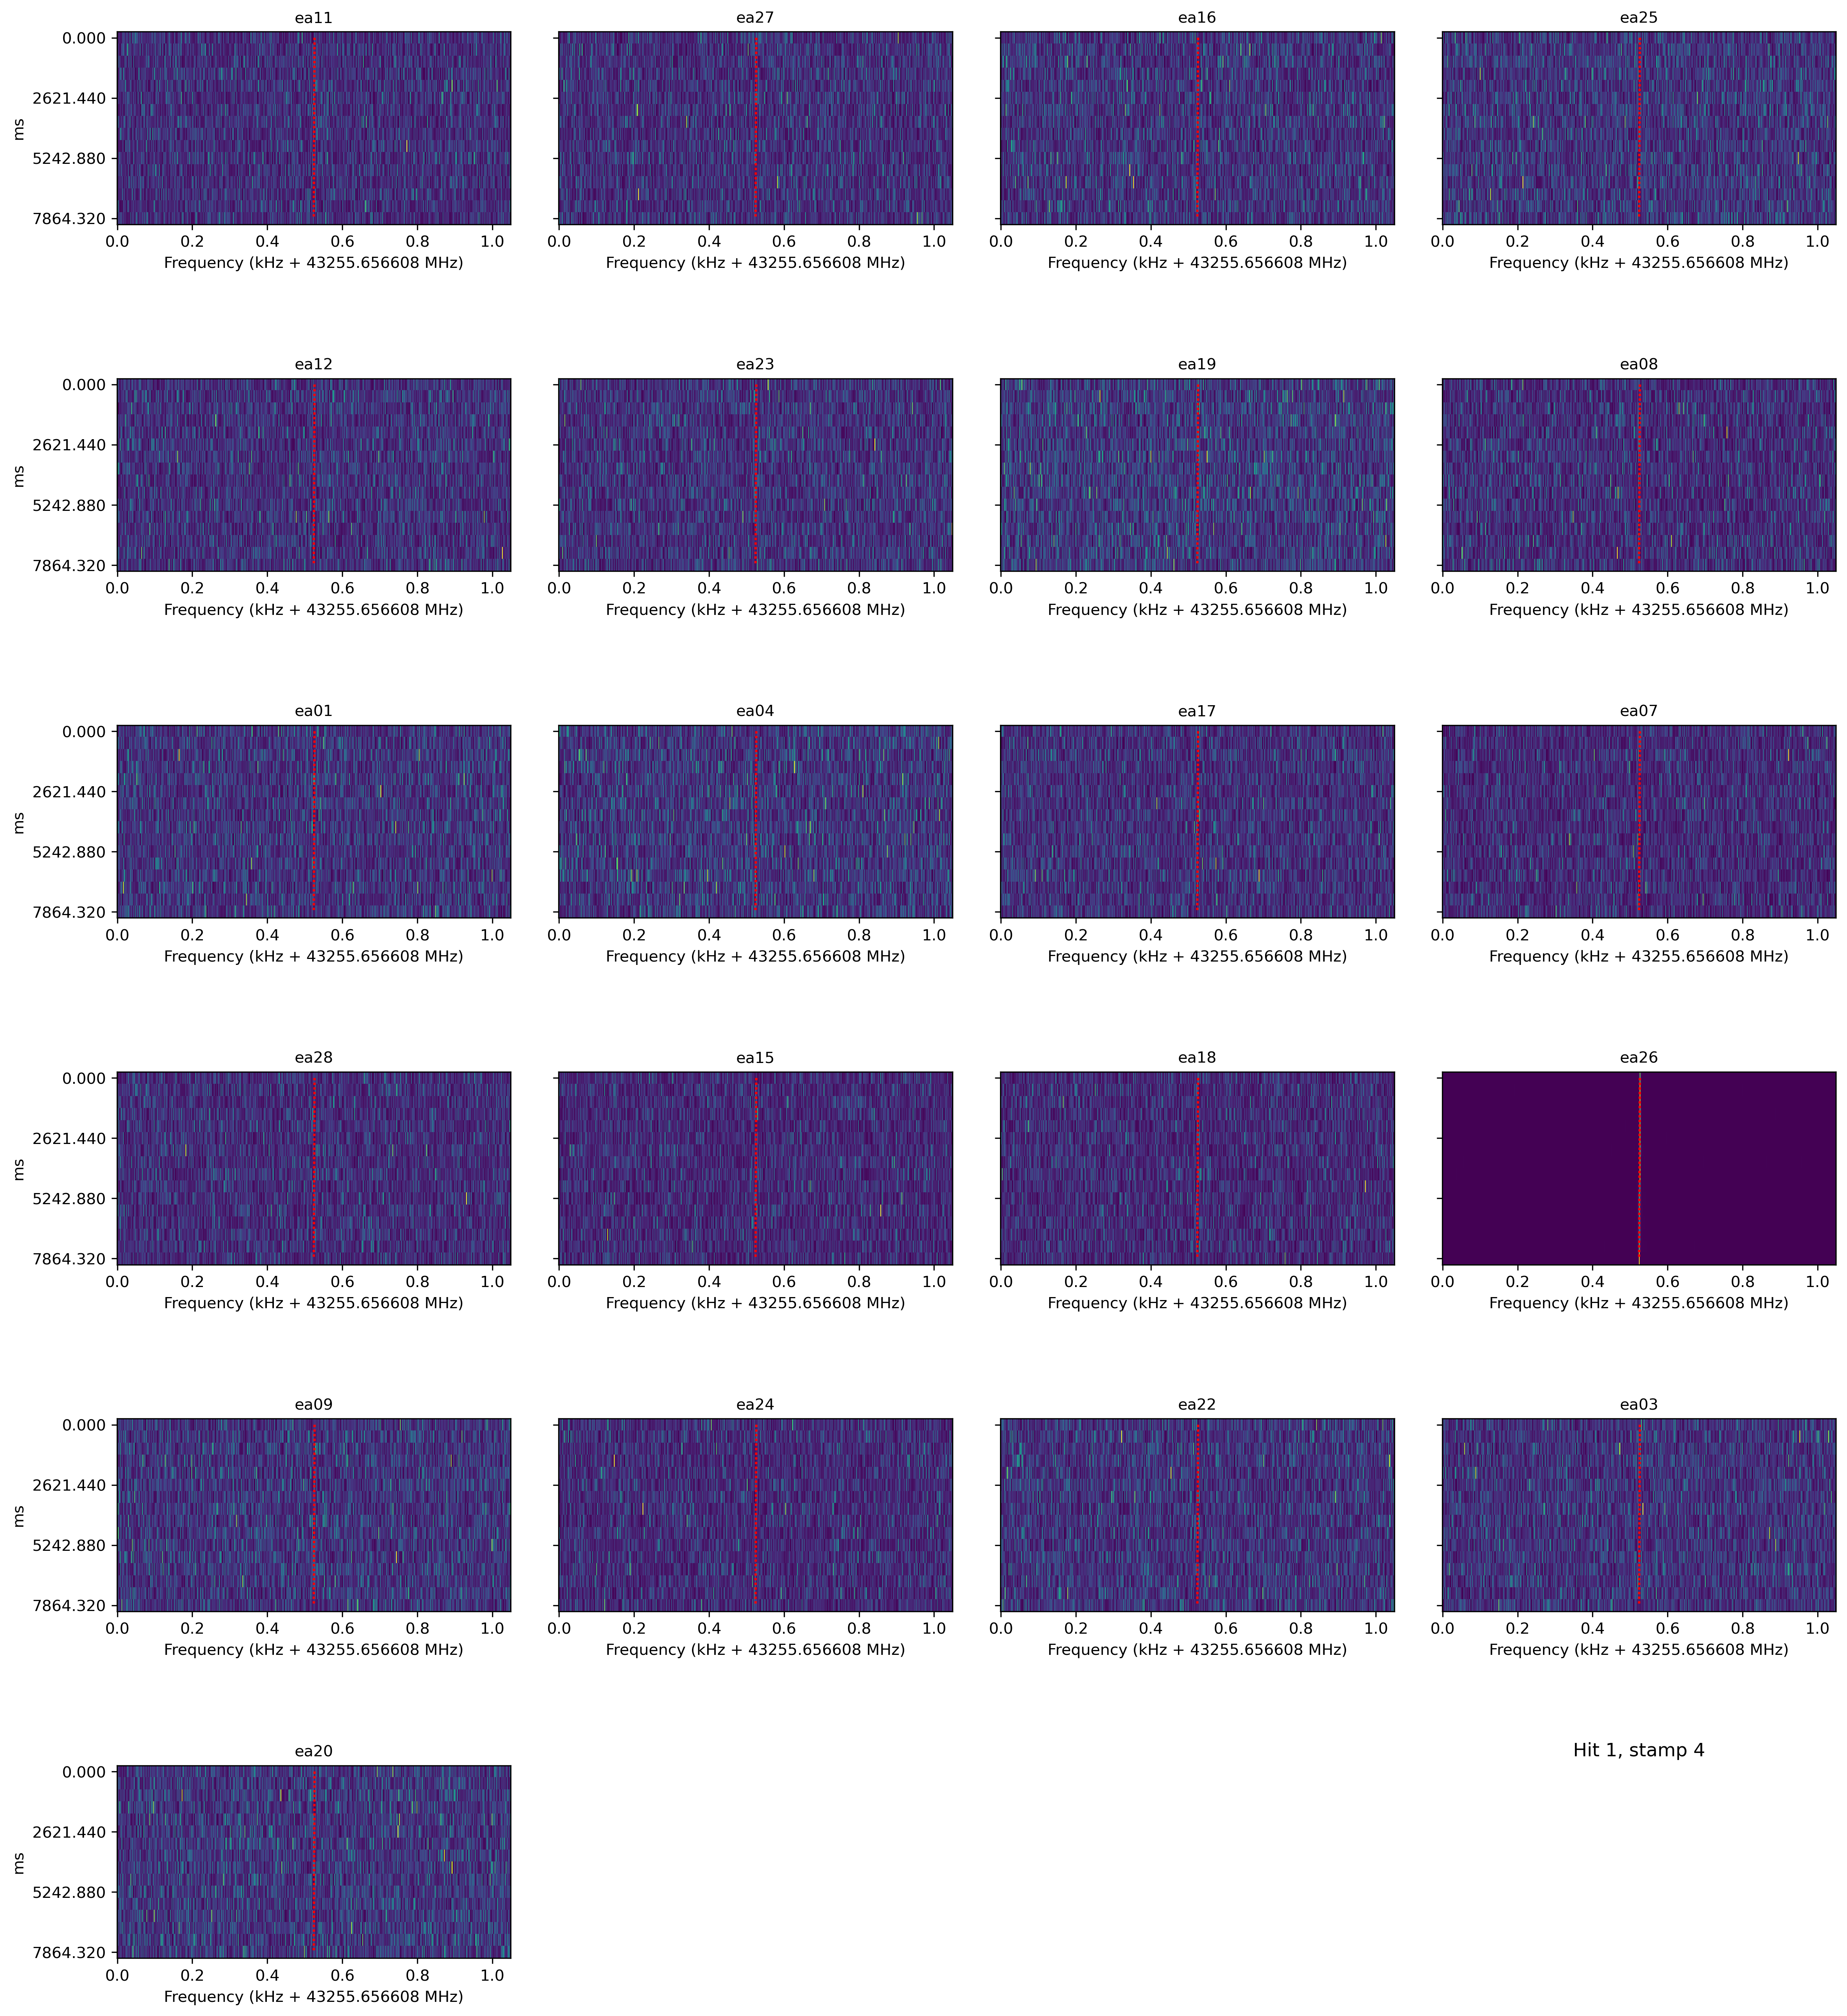

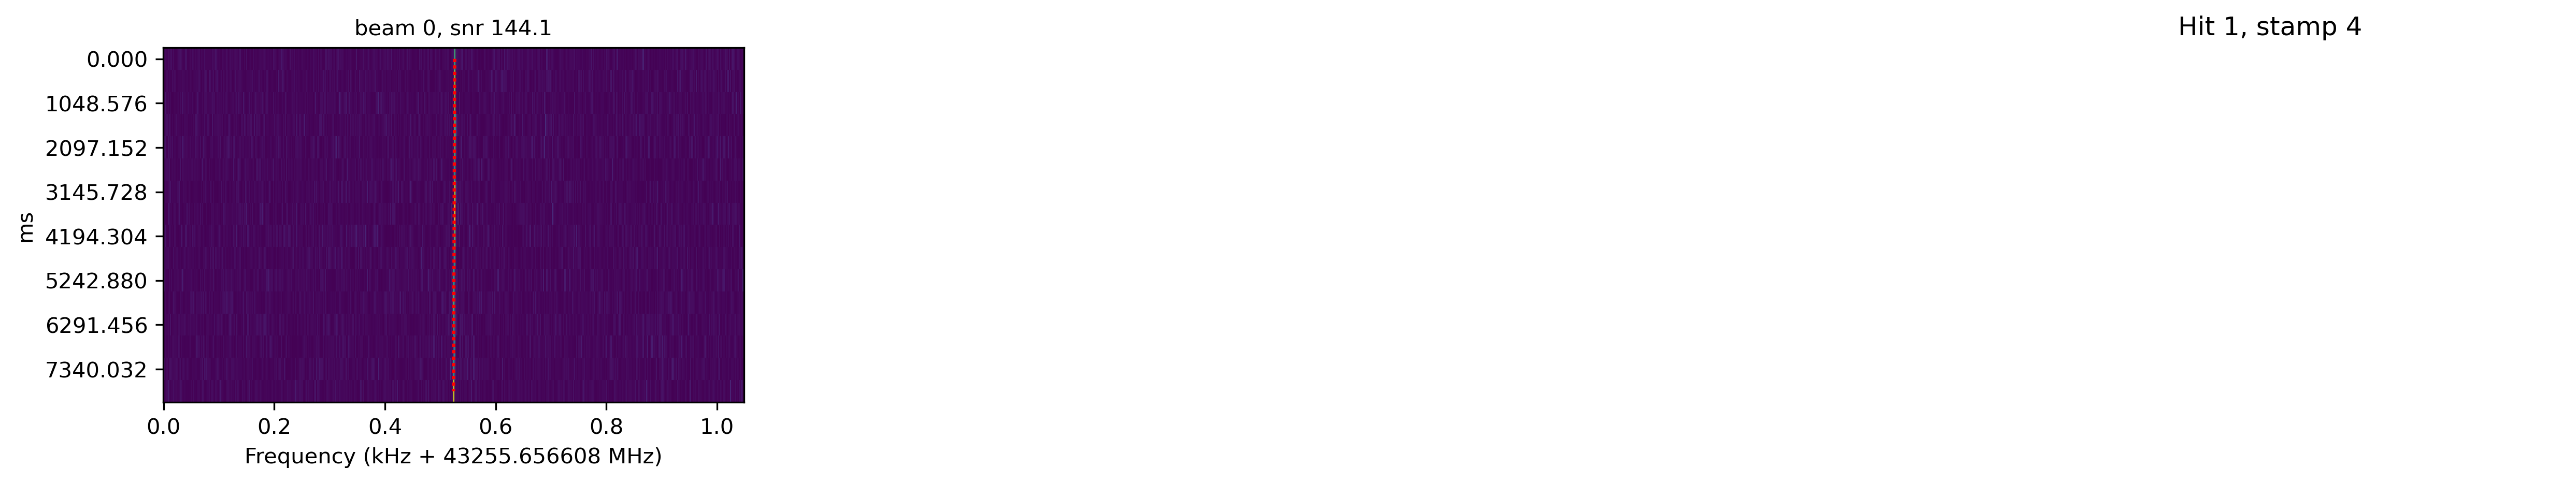

recalculated power: 7.432709e+12
local SNR: 845.0719460939467


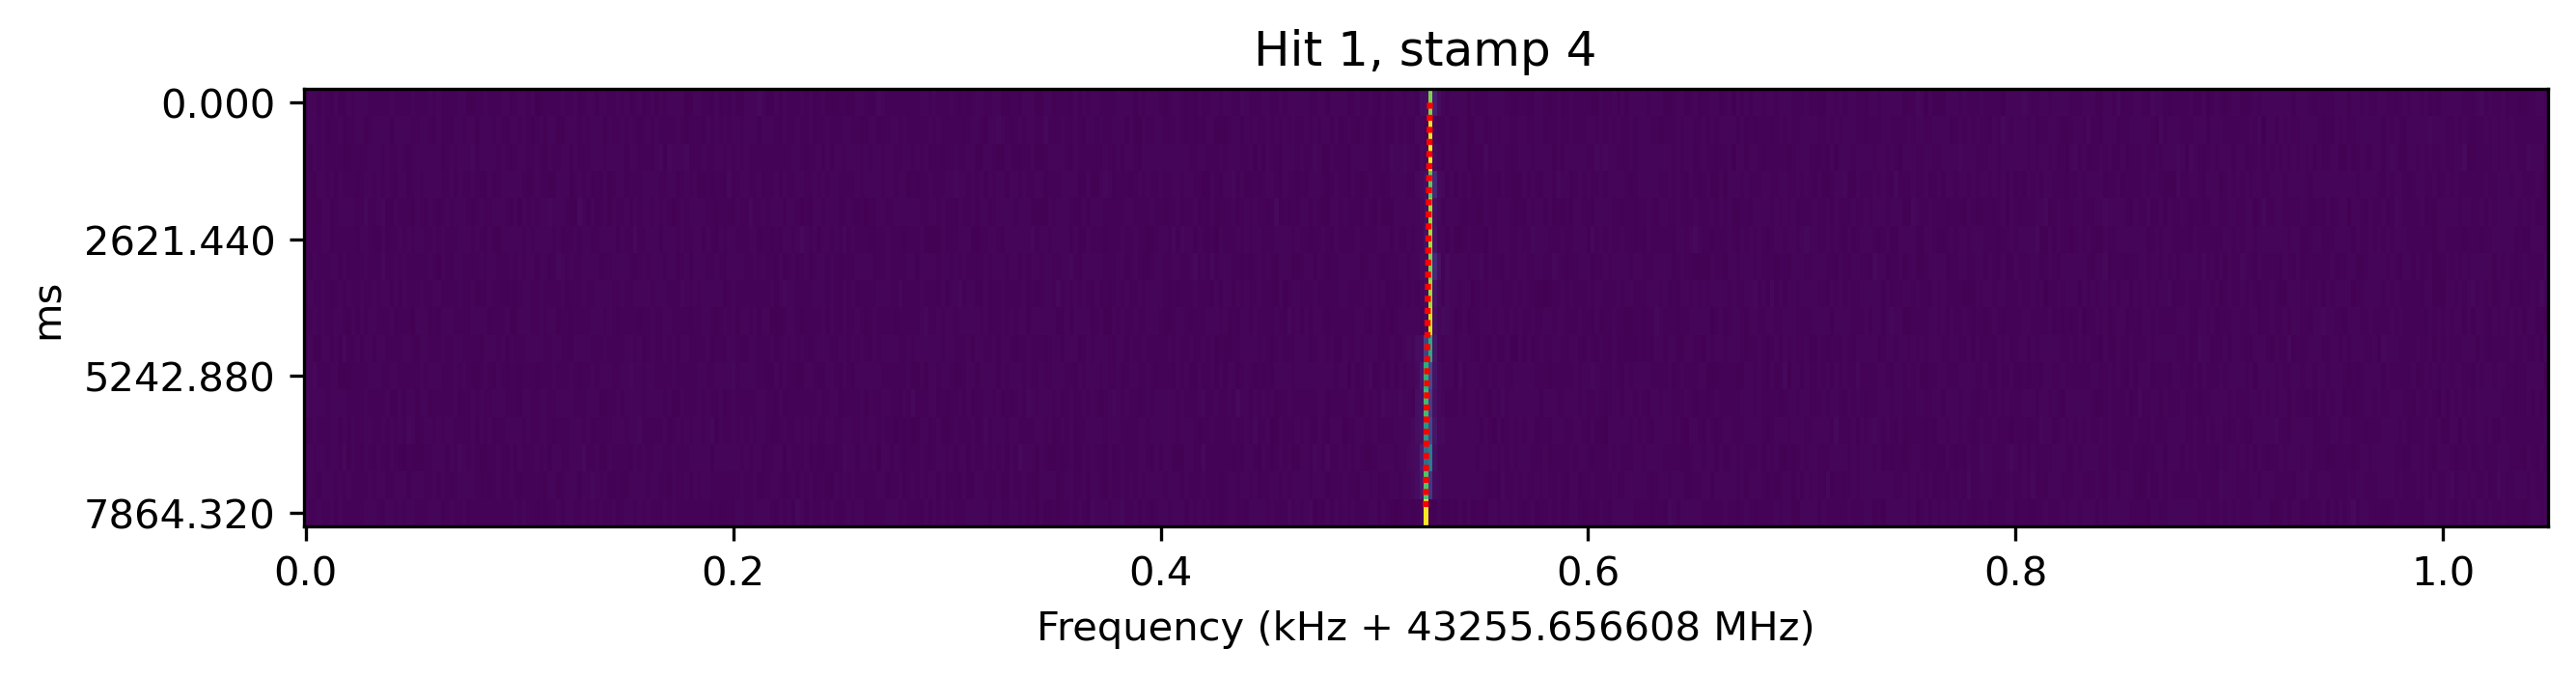

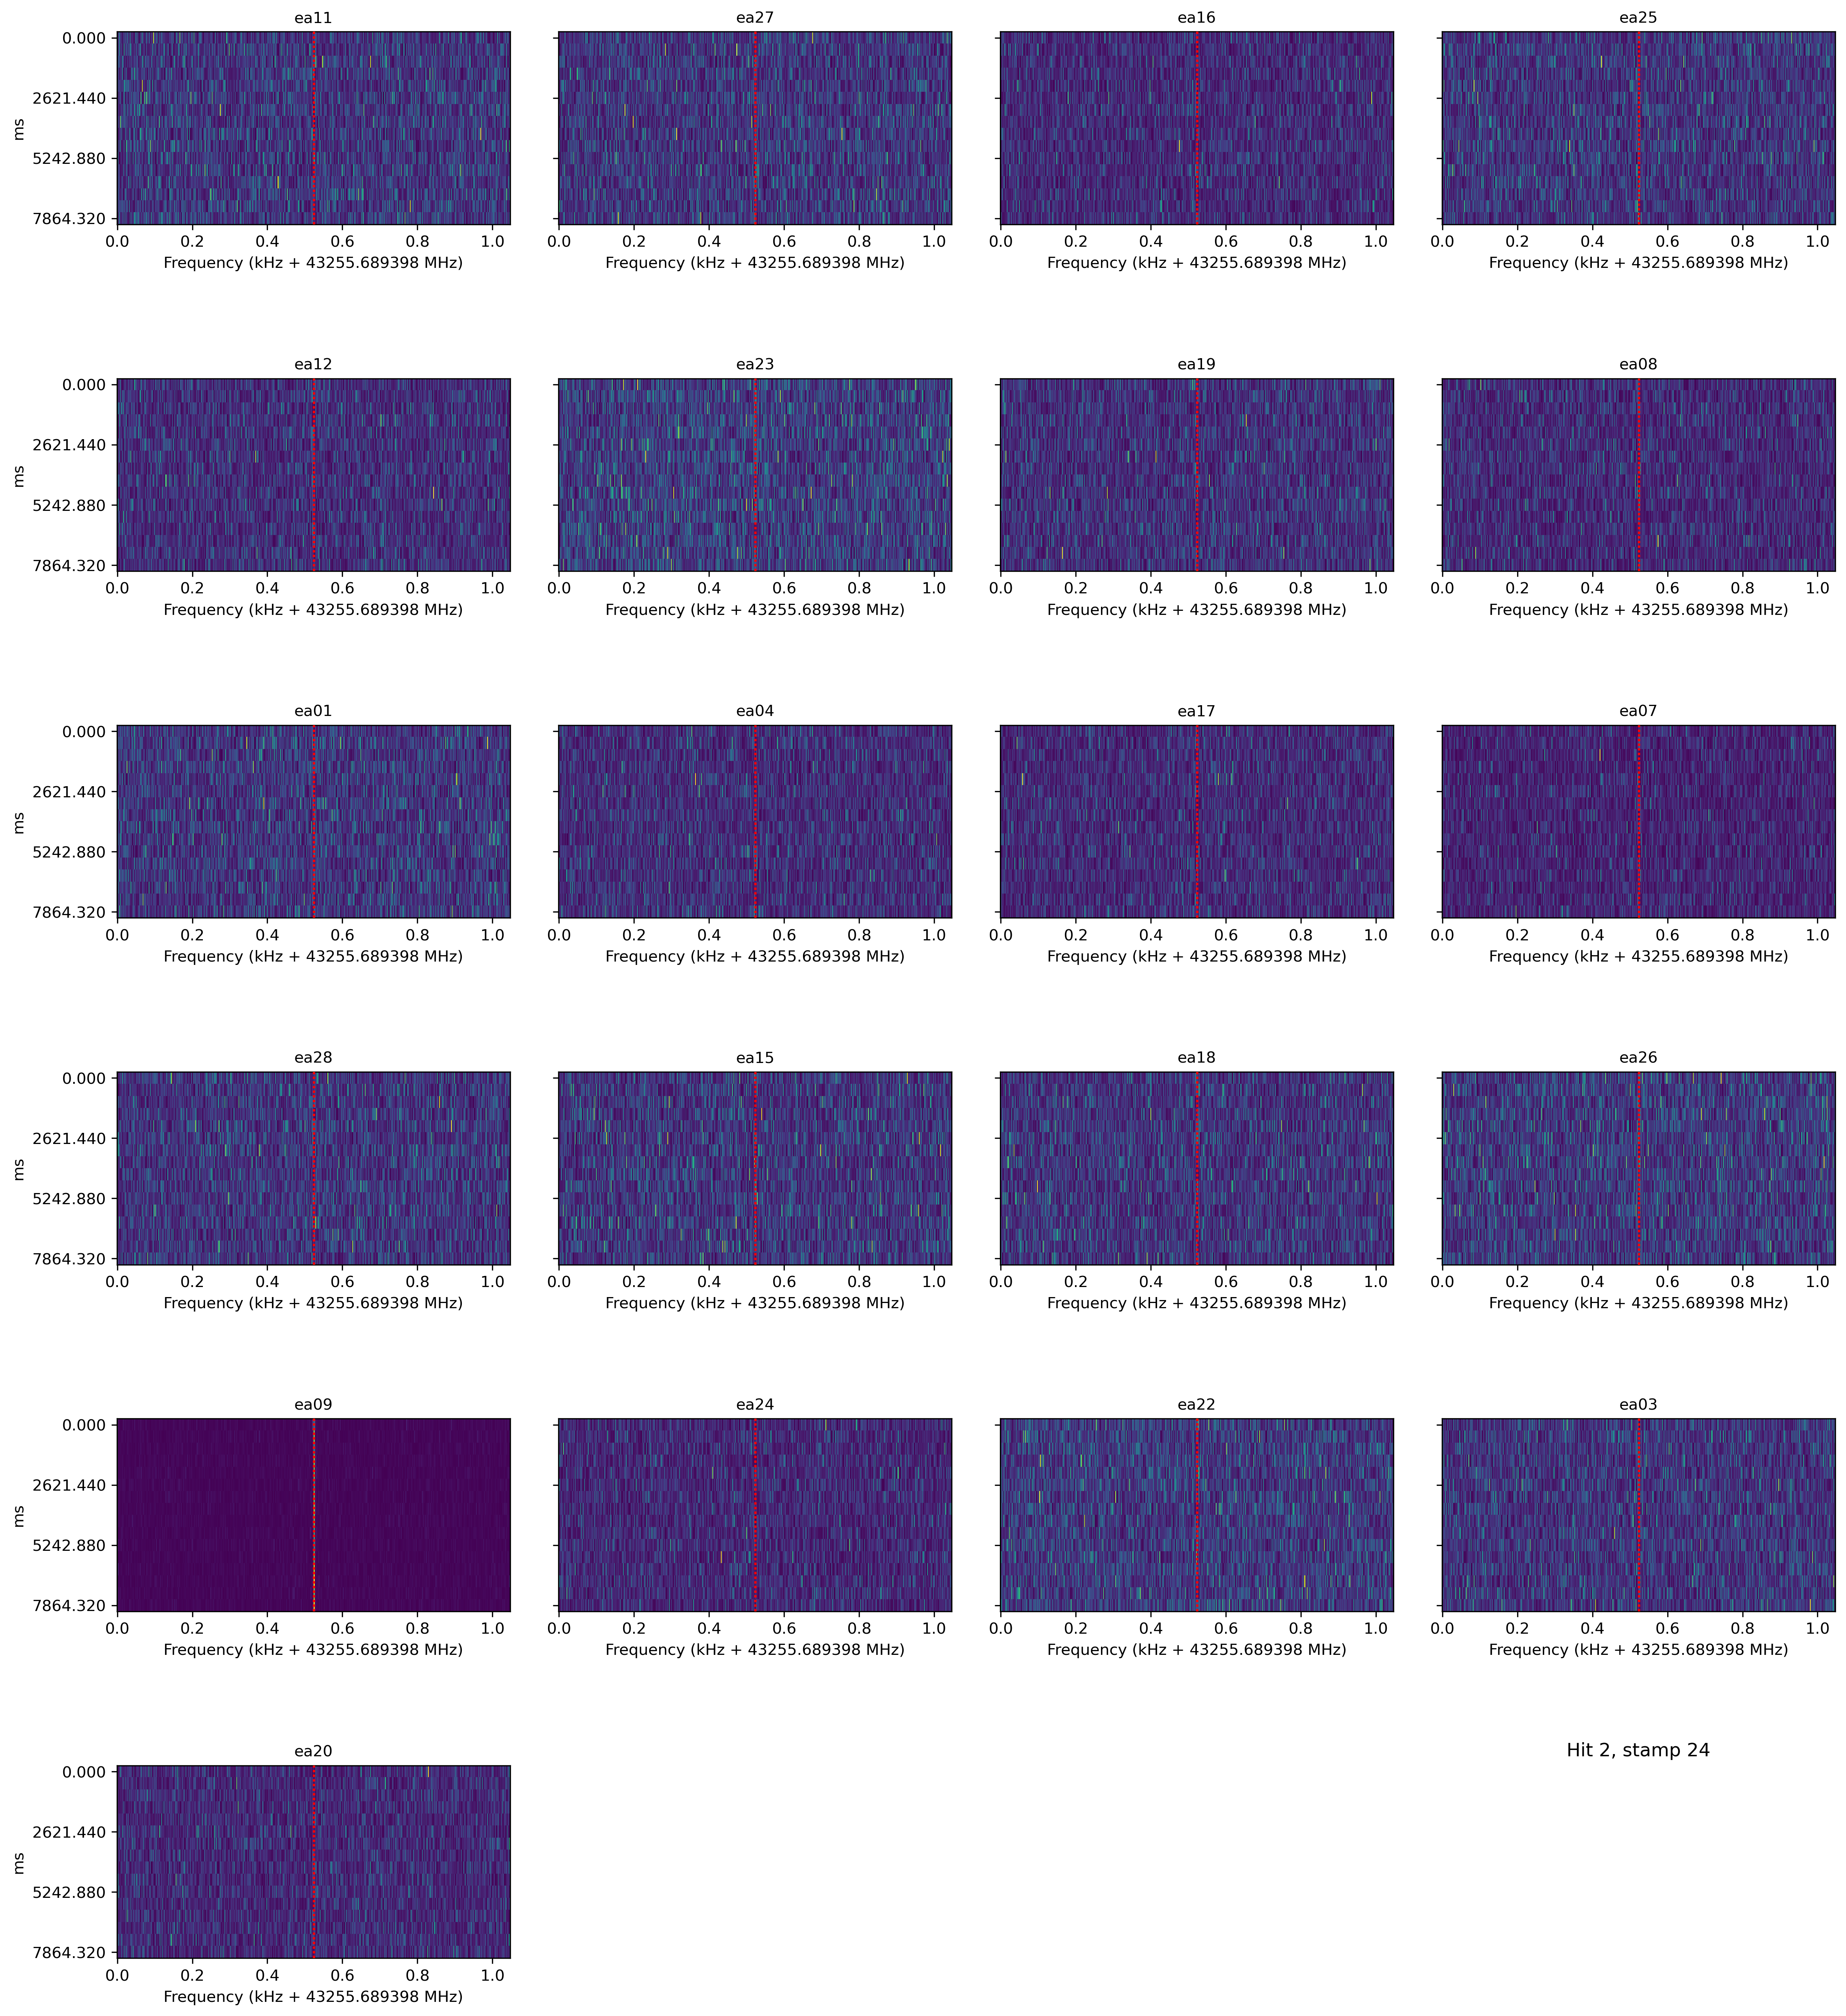

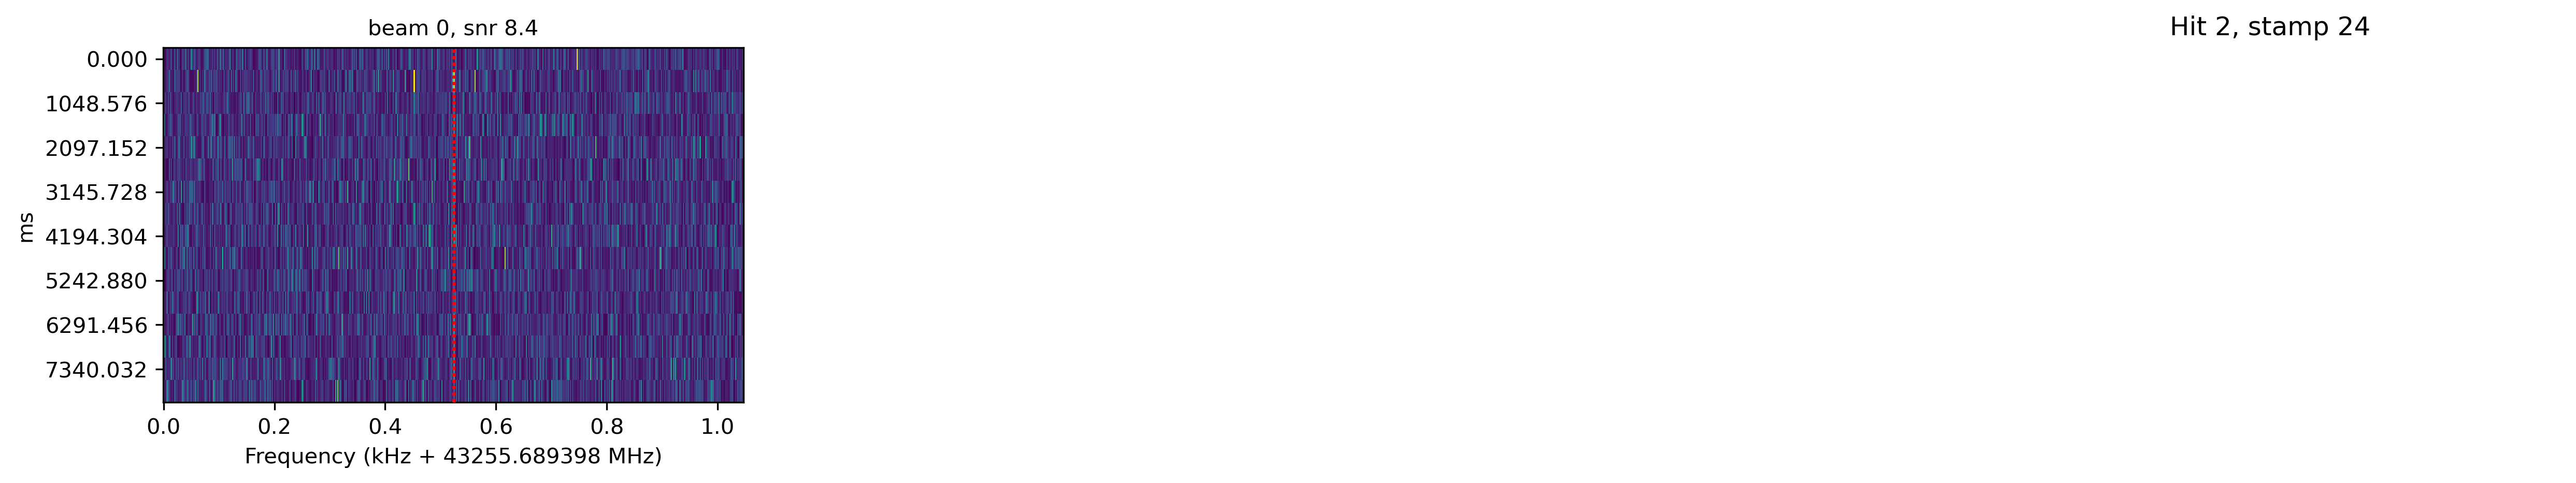

recalculated power: 7.114132e+11
local SNR: 43.34952463794853


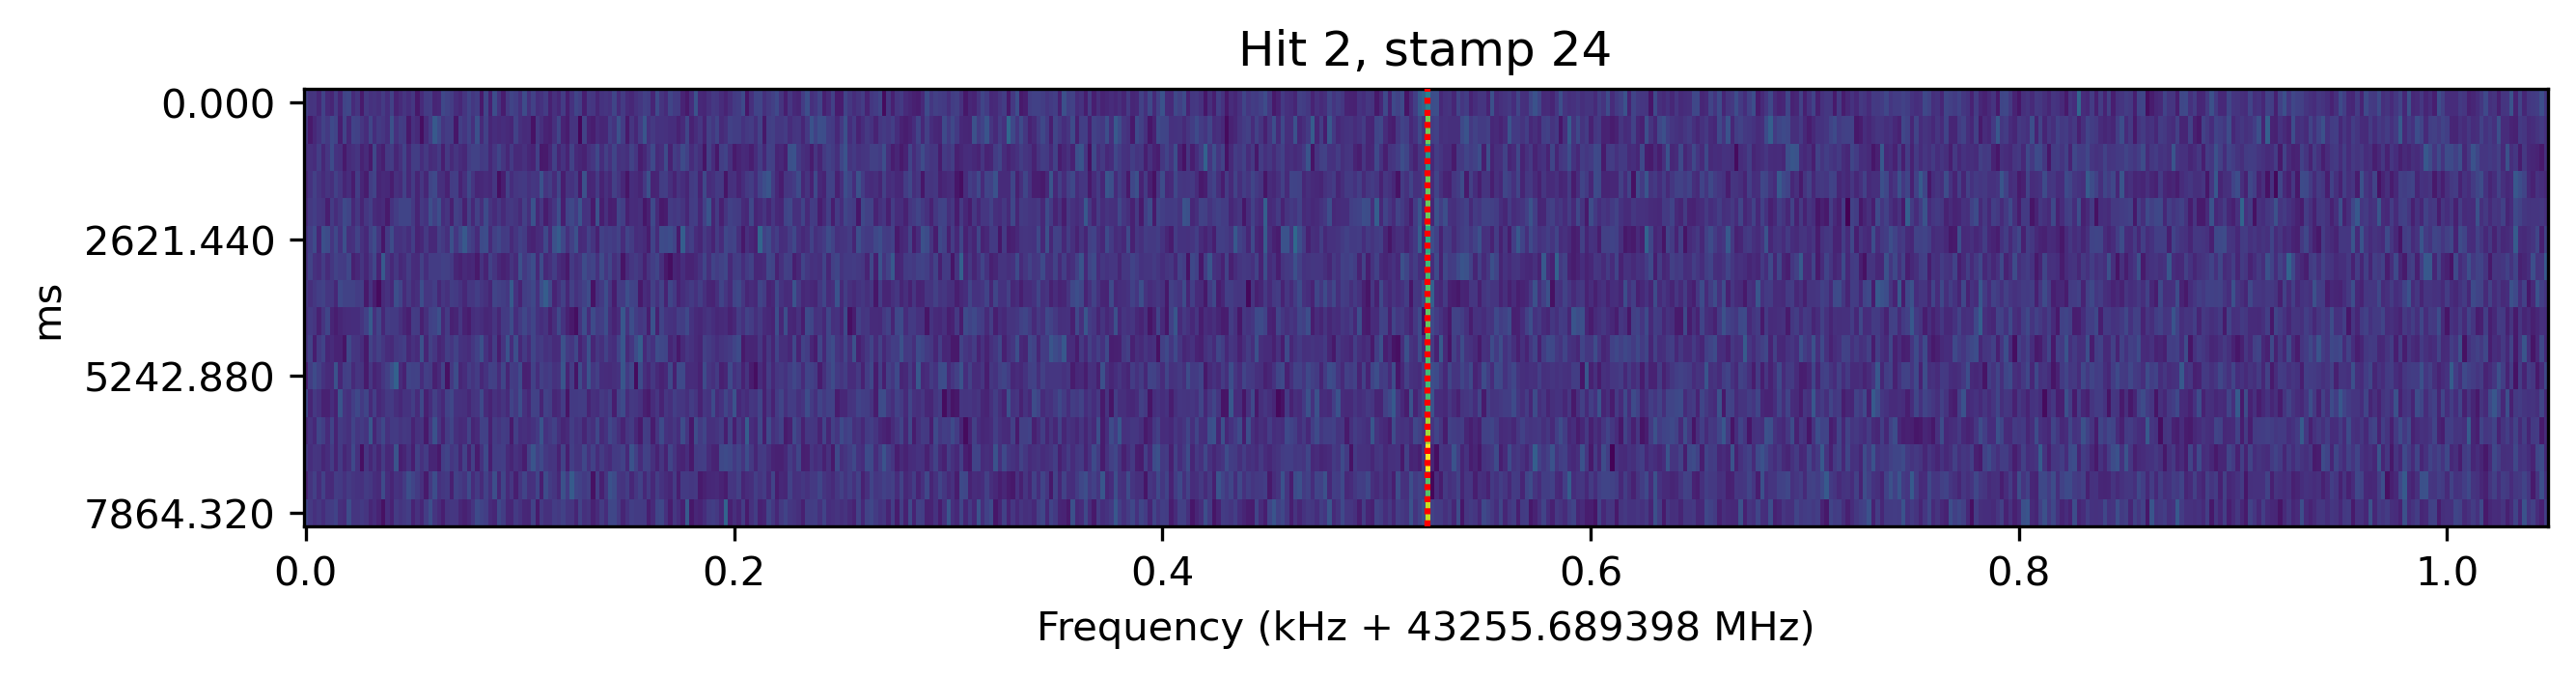

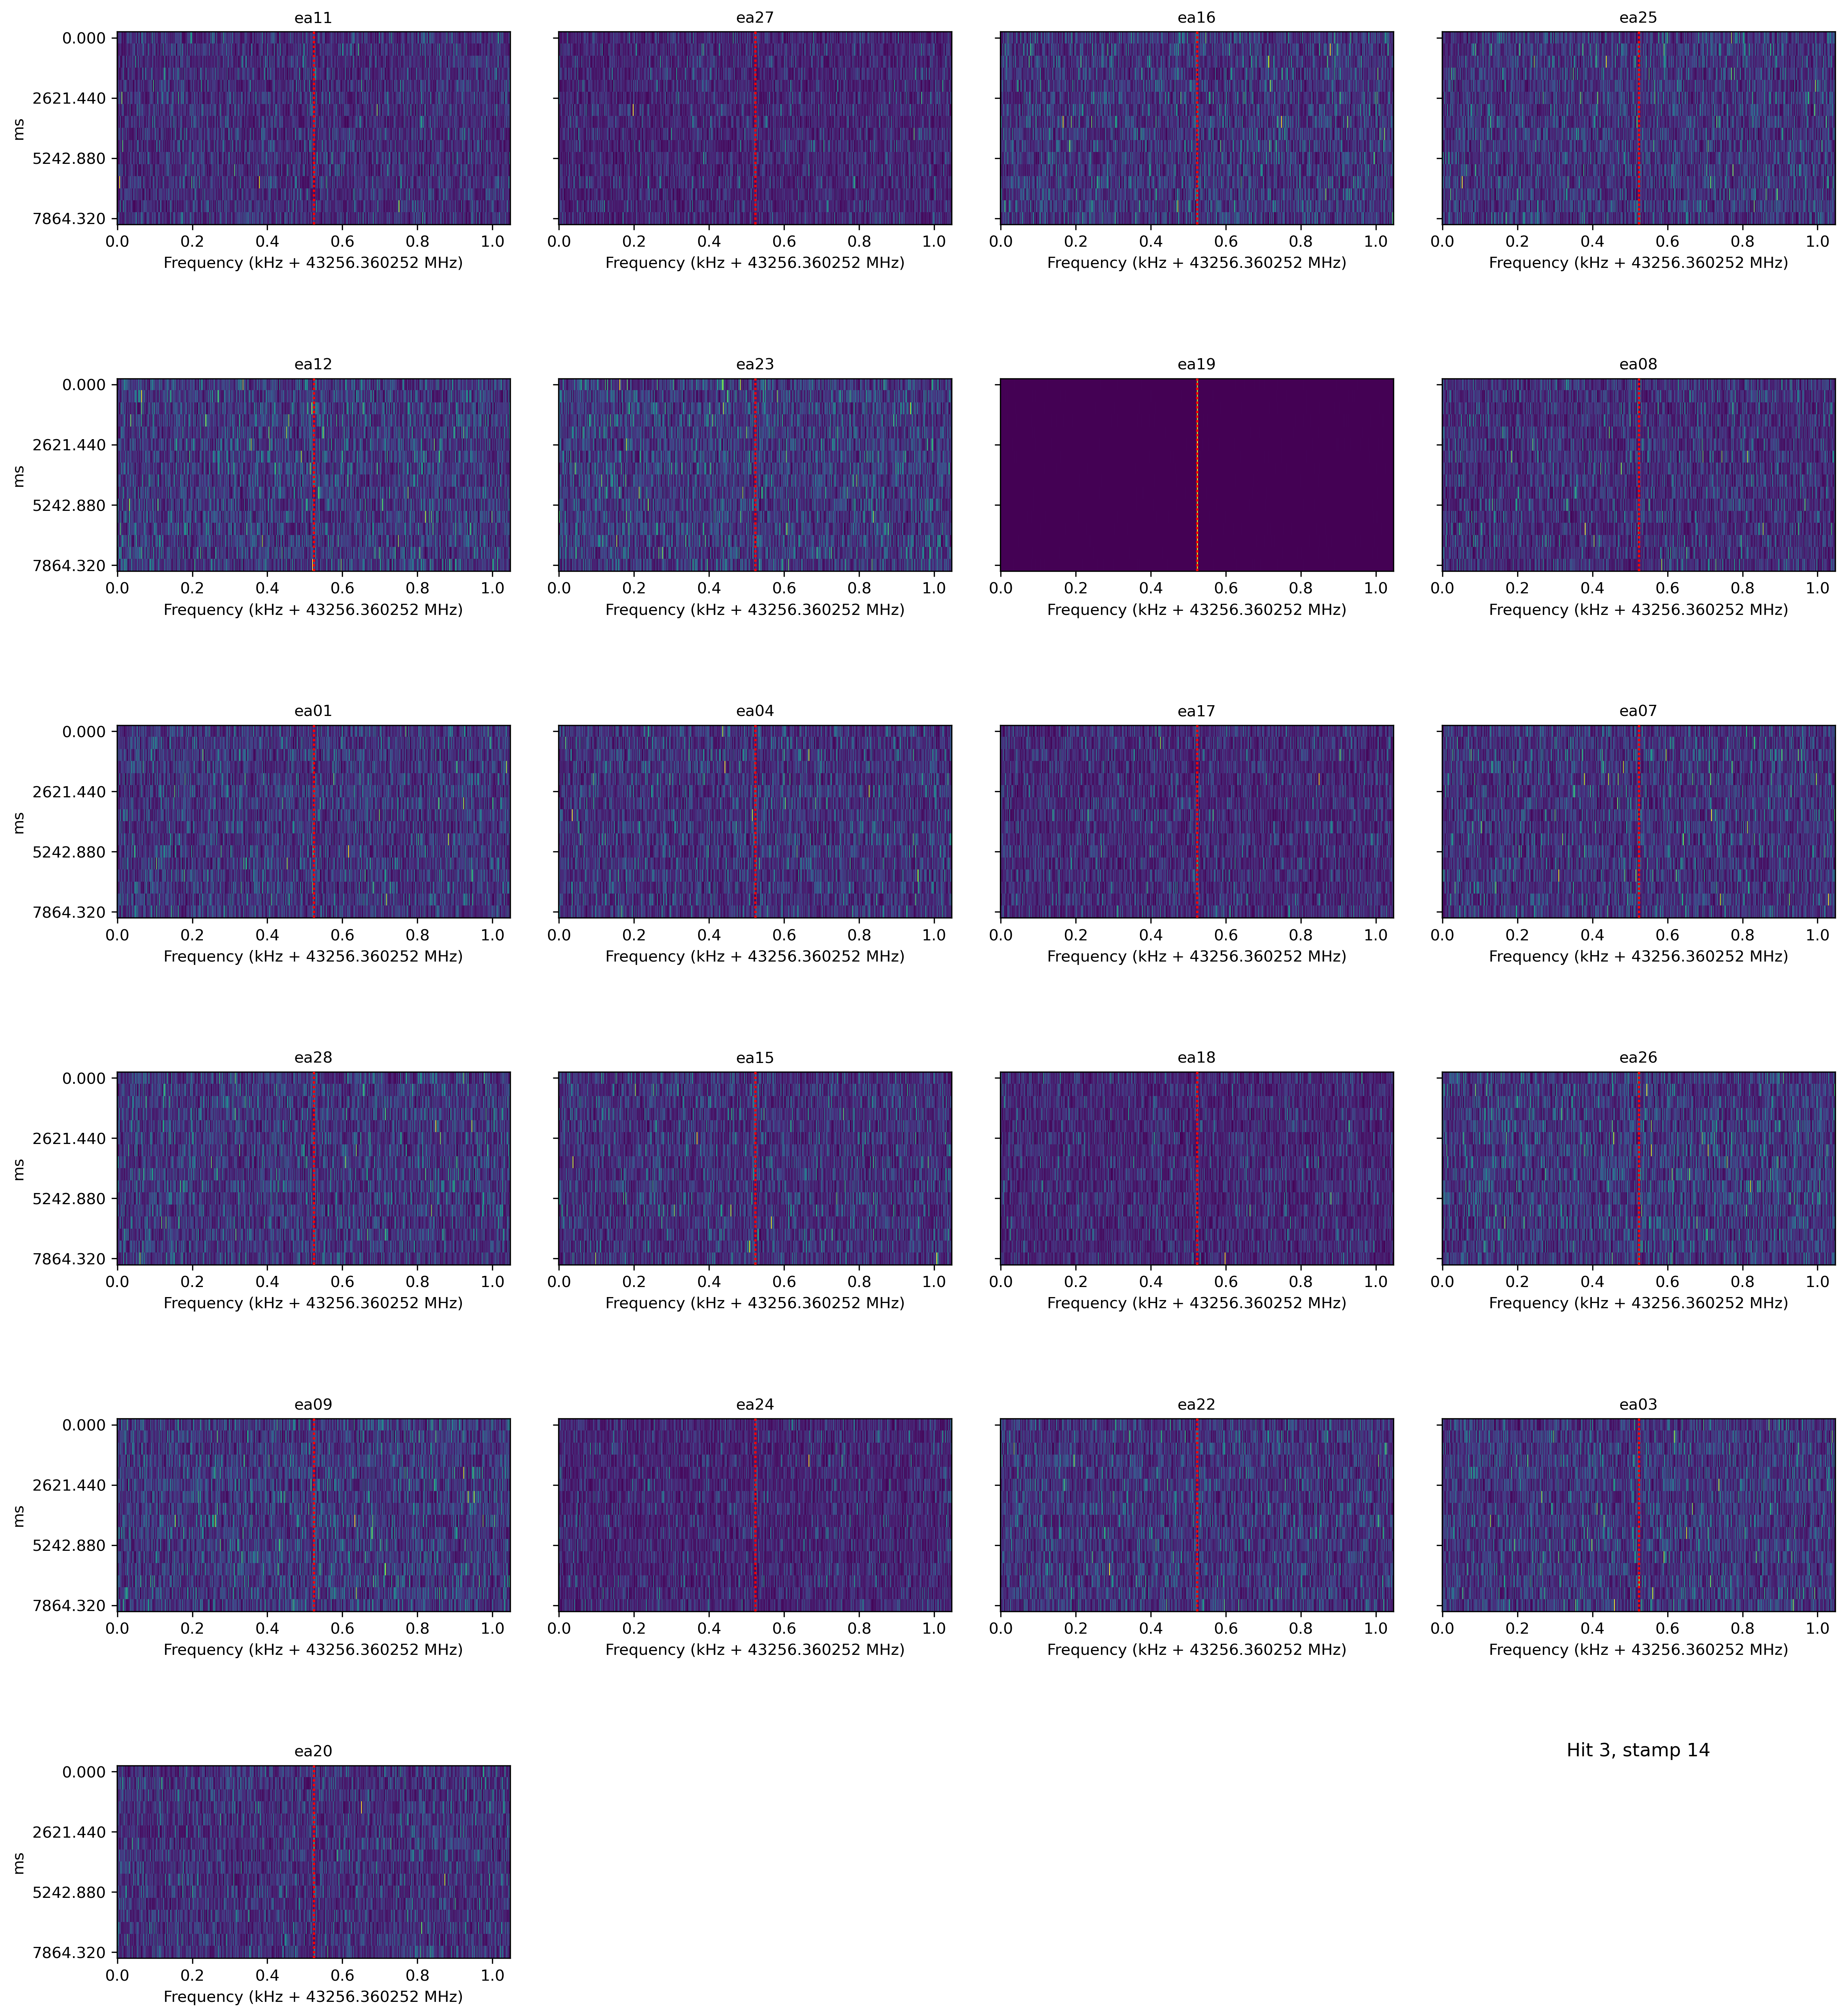

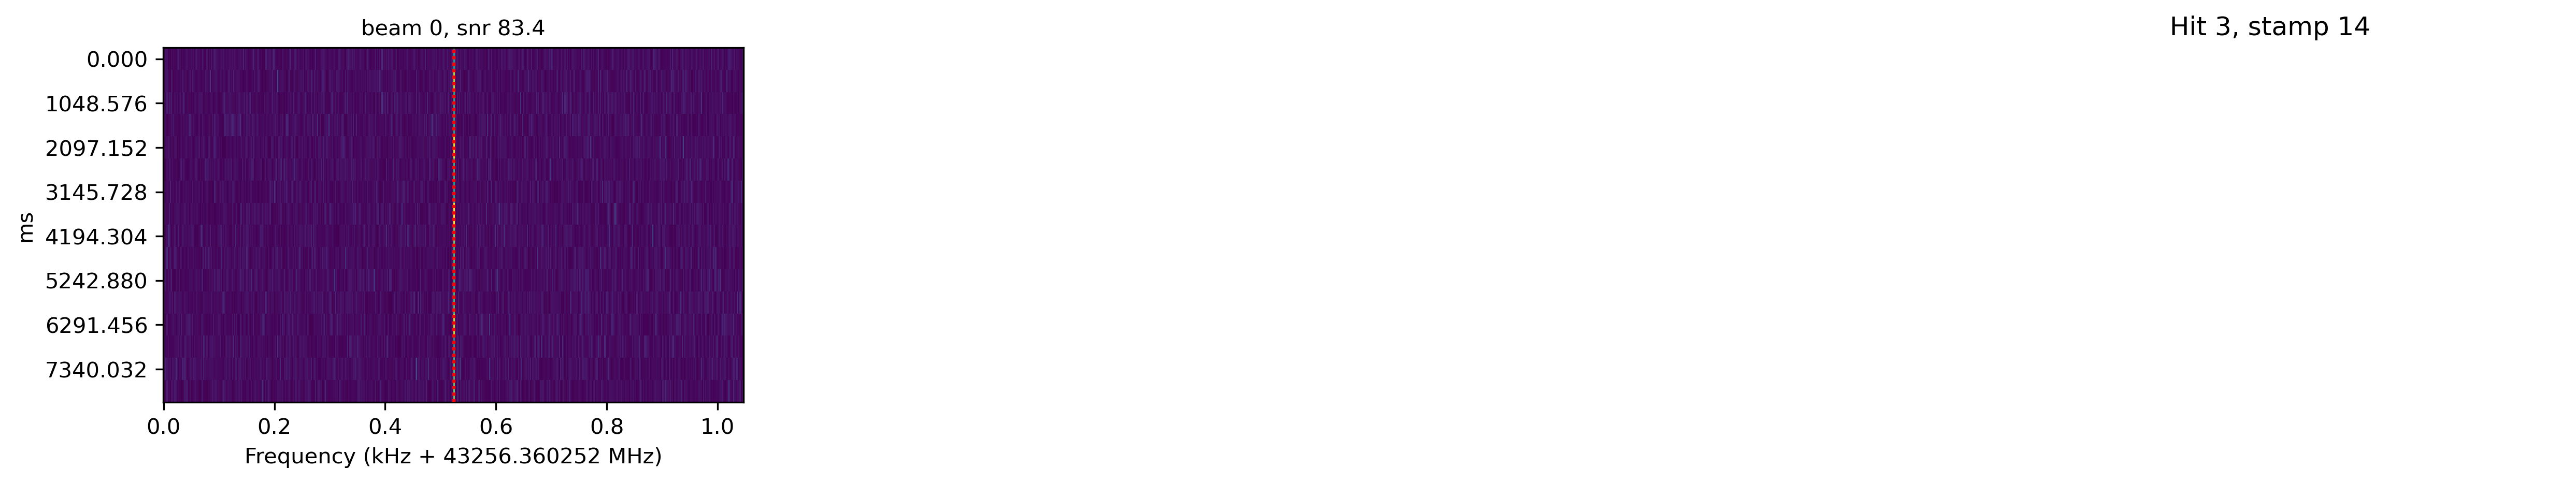

recalculated power: 2.619809e+12
local SNR: 470.7298590460067


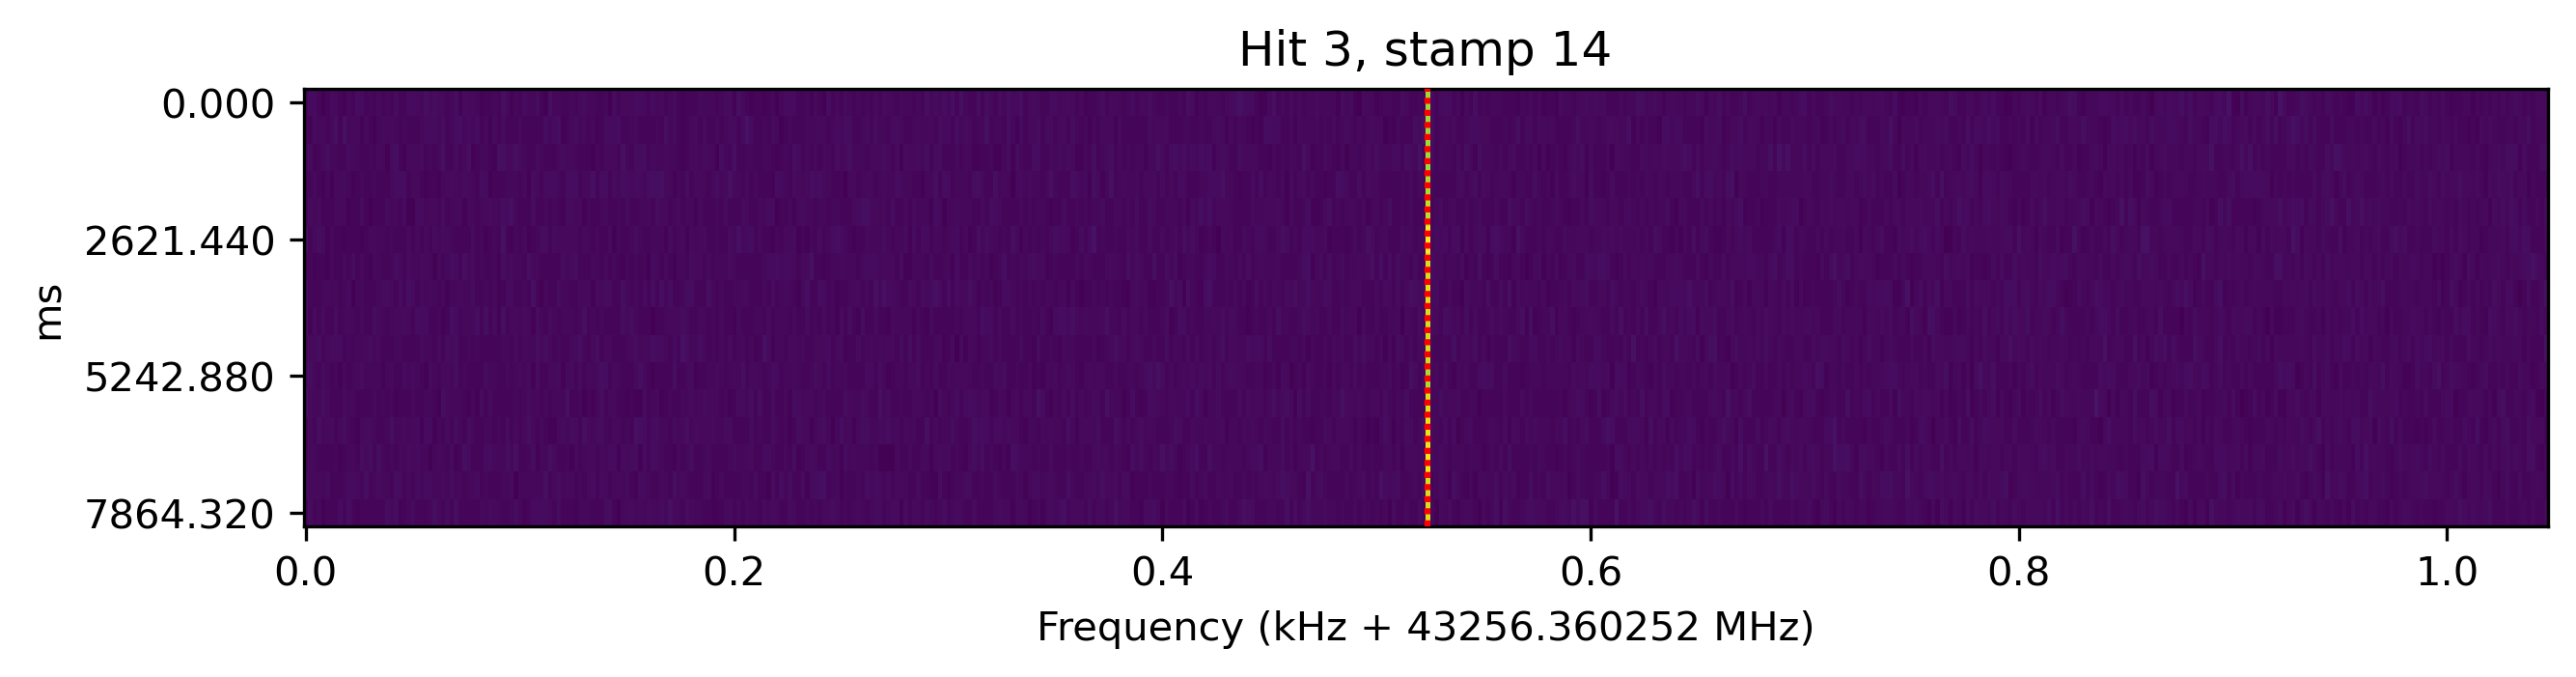

In [35]:
# Look at the information for these hits
for i, ihit in enumerate(indices_of_hits):
    stamp = stamps[ihit]
    stamp.show_antennas(title=f"Hit {i}, stamp {ihit}", show_signal=True)
    stamp.show_beams(title=f"Hit {i}, stamp {ihit}", show_signal=True)
    stamp.show_classic_incoherent(title=f"Hit {i}, stamp {ihit}", show_signal=True)

## Invesigate all stamps in stamp file

In [ ]:
# # I guess just look at all the antennas
# # Maybe in the future add some feature to the seticore viewer
# # to save the graphs to a location instead of just displaying them
# for i, stamp in enumerate(stamps):
#     stamp.show_antennas(title=f"Stamp {i}", show_signal=True)
#     stamp.show_beams(title=f"Stamp {i}", show_signal=True)
#     stamp.show_classic_incoherent(title=f"Stamp {i}", show_signal=True)
#     stamp.show_weighted_incoherent(title=f"Stamp {i}", show_signal=True)